## DMML Assignment 3

Sampad Kumar Kar and Shankar Ram Vasudevan

## Importing requried packages and models

In [2]:
import numpy as np
import time
import mnist_reader

from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

## Importing required Data

In [3]:
path = "C:/Users/Shankar/Desktop/assignments/DMML/Assignments"

X_train, y_train = mnist_reader.load_mnist(path ,kind='train')
X_test, y_test = mnist_reader.load_mnist(path, kind='t10k')

In [4]:
cluster = []
misclassification_rate = []

In [5]:
for n in range(100,500,100):
    for threshold in range(1000,2000,250):
        
        print('Number of clusters :', n, '\n', ' Threshold value : ', threshold, '\n')
        
        kmeans = KMeans(n_clusters=n, random_state=42, verbose = 1).fit(X_train)
        
        closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_train)
        labels = kmeans.labels_
        
        X_mod = []
        y_mod = []

        for i in tqdm(range(len(X_train))):
            point = X_train[i]
            centroid = closest[labels[i]]
            distance = pairwise_distances(point.reshape(1,-1), X_train[centroid].reshape(1,-1))
            if distance < threshold:
                X_mod.append(point)
                y_mod.append(y_train[centroid])

        clf = LogisticRegression(random_state=42, multi_class = 'multinomial', verbose = 1).fit(X_mod, y_mod)
        
        y_pred = clf.predict(X_test)

        error = 0
        
        for i in range(len(y_pred)):
            if y_pred[i] != y_test[i]:
                error += 1
        
        error = error/100
        
        cluster.append(n)
        misclassification_rate.append([error])

Number of clusters : 100 
  Threshold value :  1000 

Initialization complete
Iteration 0, inertia 120132238298.0
Iteration 1, inertia 83428347852.38618
Iteration 2, inertia 81518543958.73846
Iteration 3, inertia 80828162284.43143
Iteration 4, inertia 80455176630.8694
Iteration 5, inertia 80183692459.21805
Iteration 6, inertia 79967474539.22104
Iteration 7, inertia 79799797974.48108
Iteration 8, inertia 79671024139.0567
Iteration 9, inertia 79590459667.07025
Iteration 10, inertia 79539553466.72966
Iteration 11, inertia 79498283068.04366
Iteration 12, inertia 79461460840.50749
Iteration 13, inertia 79432244032.78595
Iteration 14, inertia 79406384914.66327
Iteration 15, inertia 79381000254.05458
Iteration 16, inertia 79356474649.14153
Iteration 17, inertia 79335430749.96332
Iteration 18, inertia 79314005421.70578
Iteration 19, inertia 79289081357.83286
Iteration 20, inertia 79264590095.72246
Iteration 21, inertia 79243313460.55847
Iteration 22, inertia 79227580649.27908
Iteration 23, ine

Iteration 50, inertia 78831964613.12149
Iteration 51, inertia 78829520332.24446
Iteration 52, inertia 78827601566.2226
Iteration 53, inertia 78825336195.27052
Iteration 54, inertia 78823512547.9171
Iteration 55, inertia 78821700385.06766
Iteration 56, inertia 78819830066.47656
Iteration 57, inertia 78817840782.0354
Iteration 58, inertia 78815730241.2354
Iteration 59, inertia 78813789028.66254
Iteration 60, inertia 78812102602.60013
Iteration 61, inertia 78810695869.0024
Iteration 62, inertia 78809326056.06775
Iteration 63, inertia 78808184500.95506
Iteration 64, inertia 78807025820.91385
Iteration 65, inertia 78805650035.47379
Iteration 66, inertia 78804540585.91023
Iteration 67, inertia 78803443556.26222
Iteration 68, inertia 78802685872.20459
Iteration 69, inertia 78801829854.65083
Iteration 70, inertia 78800910007.98894
Iteration 71, inertia 78800073161.2504
Iteration 72, inertia 78799355895.94876
Iteration 73, inertia 78798483776.3035
Iteration 74, inertia 78797472404.55307
Iterati

Iteration 103, inertia 78772055504.62021
Iteration 104, inertia 78771835998.78676
Iteration 105, inertia 78771647158.41327
Iteration 106, inertia 78771354951.11327
Iteration 107, inertia 78771110504.67934
Iteration 108, inertia 78770734041.60403
Iteration 109, inertia 78770312613.6914
Iteration 110, inertia 78769696852.60434
Iteration 111, inertia 78769285762.24103
Iteration 112, inertia 78769006986.9064
Iteration 113, inertia 78768786186.87625
Iteration 114, inertia 78768523251.702
Iteration 115, inertia 78768323995.08517
Iteration 116, inertia 78768068389.97134
Iteration 117, inertia 78767771610.2056
Iteration 118, inertia 78767401349.95067
Iteration 119, inertia 78767043130.13219
Iteration 120, inertia 78766704541.93515
Iteration 121, inertia 78766301300.46872
Iteration 122, inertia 78765764519.6193
Iteration 123, inertia 78765284011.45468
Iteration 124, inertia 78764755789.21263
Iteration 125, inertia 78764226028.90591
Iteration 126, inertia 78763598180.56503
Iteration 127, inertia

Iteration 17, inertia 79193262263.26263
Iteration 18, inertia 79166615779.60353
Iteration 19, inertia 79143943025.77434
Iteration 20, inertia 79120550384.34341
Iteration 21, inertia 79095429813.98055
Iteration 22, inertia 79069695465.63564
Iteration 23, inertia 79044972154.44681
Iteration 24, inertia 79024566562.1259
Iteration 25, inertia 79008561015.24648
Iteration 26, inertia 78995131944.38246
Iteration 27, inertia 78984022169.38068
Iteration 28, inertia 78976066909.17128
Iteration 29, inertia 78969834100.54865
Iteration 30, inertia 78964194849.86606
Iteration 31, inertia 78958822247.7362
Iteration 32, inertia 78954246889.7857
Iteration 33, inertia 78949834465.22198
Iteration 34, inertia 78946725071.62689
Iteration 35, inertia 78944022100.12201
Iteration 36, inertia 78941212746.74777
Iteration 37, inertia 78938215018.57645
Iteration 38, inertia 78935199811.63182
Iteration 39, inertia 78932123525.78268
Iteration 40, inertia 78928926369.26143
Iteration 41, inertia 78925457856.948
Itera

Iteration 10, inertia 79296385382.83629
Iteration 11, inertia 79251238485.31154
Iteration 12, inertia 79214607770.76033
Iteration 13, inertia 79183954696.94304
Iteration 14, inertia 79157246220.82907
Iteration 15, inertia 79133049223.29622
Iteration 16, inertia 79109330151.7531
Iteration 17, inertia 79090149260.83366
Iteration 18, inertia 79073163301.24403
Iteration 19, inertia 79059083570.67422
Iteration 20, inertia 79046994959.90604
Iteration 21, inertia 79035829238.8002
Iteration 22, inertia 79025771438.54181
Iteration 23, inertia 79018310176.18658
Iteration 24, inertia 79010915005.55116
Iteration 25, inertia 79004063318.9767
Iteration 26, inertia 78998644506.18268
Iteration 27, inertia 78993067746.2959
Iteration 28, inertia 78988781136.39078
Iteration 29, inertia 78984478420.72098
Iteration 30, inertia 78980617293.28067
Iteration 31, inertia 78977274571.75415
Iteration 32, inertia 78973576077.75977
Iteration 33, inertia 78969735404.8556
Iteration 34, inertia 78965647912.02153
Itera

Iteration 44, inertia 78707263259.81068
Iteration 45, inertia 78705369372.15787
Iteration 46, inertia 78703951731.0194
Iteration 47, inertia 78702478249.25313
Iteration 48, inertia 78701232751.82053
Iteration 49, inertia 78700042509.86781
Iteration 50, inertia 78698968128.28835
Iteration 51, inertia 78697840494.24908
Iteration 52, inertia 78696565591.40771
Iteration 53, inertia 78695300546.27135
Iteration 54, inertia 78694246667.62645
Iteration 55, inertia 78693088576.85905
Iteration 56, inertia 78692034854.22395
Iteration 57, inertia 78690876202.23412
Iteration 58, inertia 78689881718.7704
Iteration 59, inertia 78688935637.3121
Iteration 60, inertia 78688072635.31161
Iteration 61, inertia 78687173102.02547
Iteration 62, inertia 78686595192.76384
Iteration 63, inertia 78686100425.40489
Iteration 64, inertia 78685366507.45958
Iteration 65, inertia 78684776581.29321
Iteration 66, inertia 78684233871.77306
Iteration 67, inertia 78683539254.13927
Iteration 68, inertia 78682810601.73183
Ite

Iteration 37, inertia 78906029846.70193
Iteration 38, inertia 78903337237.04639
Iteration 39, inertia 78901025231.02184
Iteration 40, inertia 78899053737.95187
Iteration 41, inertia 78897274756.23233
Iteration 42, inertia 78895543044.0364
Iteration 43, inertia 78893982624.0185
Iteration 44, inertia 78892549335.54741
Iteration 45, inertia 78891520316.35913
Iteration 46, inertia 78890525537.86482
Iteration 47, inertia 78889791781.66095
Iteration 48, inertia 78888827500.92719
Iteration 49, inertia 78887734967.4525
Iteration 50, inertia 78886945214.96077
Iteration 51, inertia 78886163875.31139
Iteration 52, inertia 78885043235.15837
Iteration 53, inertia 78883871959.64267
Iteration 54, inertia 78882668087.80574
Iteration 55, inertia 78881561832.76642
Iteration 56, inertia 78880212491.80988
Iteration 57, inertia 78878959313.16716
Iteration 58, inertia 78877728084.8867
Iteration 59, inertia 78876550542.18028
Iteration 60, inertia 78875493626.74414
Iteration 61, inertia 78874152098.14732
Iter

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7721.79it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


Number of clusters : 100 
  Threshold value :  1250 

Initialization complete
Iteration 0, inertia 120132238298.0
Iteration 1, inertia 83428347852.38617
Iteration 2, inertia 81518543958.73845
Iteration 3, inertia 80828162284.43144
Iteration 4, inertia 80455176630.8694
Iteration 5, inertia 80183692459.21805
Iteration 6, inertia 79967474539.22104
Iteration 7, inertia 79799797974.4811
Iteration 8, inertia 79671024139.05672
Iteration 9, inertia 79590459667.07025
Iteration 10, inertia 79539553466.72966
Iteration 11, inertia 79498283068.04366
Iteration 12, inertia 79461460840.50749
Iteration 13, inertia 79432244032.78595
Iteration 14, inertia 79406384914.66327
Iteration 15, inertia 79381000254.05458
Iteration 16, inertia 79356474649.14153
Iteration 17, inertia 79335430749.96332
Iteration 18, inertia 79314005421.70578
Iteration 19, inertia 79289081357.83286
Iteration 20, inertia 79264590095.72246
Iteration 21, inertia 79243313460.55847
Iteration 22, inertia 79227580649.27908
Iteration 23, ine

Iteration 49, inertia 78834858535.63388
Iteration 50, inertia 78831964613.12148
Iteration 51, inertia 78829520332.24448
Iteration 52, inertia 78827601566.2226
Iteration 53, inertia 78825336195.27052
Iteration 54, inertia 78823512547.9171
Iteration 55, inertia 78821700385.06764
Iteration 56, inertia 78819830066.47656
Iteration 57, inertia 78817840782.03542
Iteration 58, inertia 78815730241.2354
Iteration 59, inertia 78813789028.66254
Iteration 60, inertia 78812102602.60013
Iteration 61, inertia 78810695869.0024
Iteration 62, inertia 78809326056.06776
Iteration 63, inertia 78808184500.95506
Iteration 64, inertia 78807025820.91385
Iteration 65, inertia 78805650035.4738
Iteration 66, inertia 78804540585.91025
Iteration 67, inertia 78803443556.26224
Iteration 68, inertia 78802685872.20459
Iteration 69, inertia 78801829854.65083
Iteration 70, inertia 78800910007.98894
Iteration 71, inertia 78800073161.2504
Iteration 72, inertia 78799355895.94876
Iteration 73, inertia 78798483776.3035
Iterati

Iteration 102, inertia 78772236210.97748
Iteration 103, inertia 78772055504.62022
Iteration 104, inertia 78771835998.78676
Iteration 105, inertia 78771647158.41327
Iteration 106, inertia 78771354951.11327
Iteration 107, inertia 78771110504.67935
Iteration 108, inertia 78770734041.60403
Iteration 109, inertia 78770312613.6914
Iteration 110, inertia 78769696852.60434
Iteration 111, inertia 78769285762.24103
Iteration 112, inertia 78769006986.9064
Iteration 113, inertia 78768786186.87625
Iteration 114, inertia 78768523251.70198
Iteration 115, inertia 78768323995.08517
Iteration 116, inertia 78768068389.97134
Iteration 117, inertia 78767771610.20558
Iteration 118, inertia 78767401349.95067
Iteration 119, inertia 78767043130.13219
Iteration 120, inertia 78766704541.93515
Iteration 121, inertia 78766301300.46873
Iteration 122, inertia 78765764519.6193
Iteration 123, inertia 78765284011.45468
Iteration 124, inertia 78764755789.21263
Iteration 125, inertia 78764226028.90591
Iteration 126, iner

Iteration 17, inertia 79193262263.26265
Iteration 18, inertia 79166615779.60353
Iteration 19, inertia 79143943025.77434
Iteration 20, inertia 79120550384.34341
Iteration 21, inertia 79095429813.98056
Iteration 22, inertia 79069695465.63564
Iteration 23, inertia 79044972154.44681
Iteration 24, inertia 79024566562.1259
Iteration 25, inertia 79008561015.24648
Iteration 26, inertia 78995131944.38246
Iteration 27, inertia 78984022169.38068
Iteration 28, inertia 78976066909.17128
Iteration 29, inertia 78969834100.54865
Iteration 30, inertia 78964194849.86604
Iteration 31, inertia 78958822247.7362
Iteration 32, inertia 78954246889.7857
Iteration 33, inertia 78949834465.22198
Iteration 34, inertia 78946725071.62689
Iteration 35, inertia 78944022100.12201
Iteration 36, inertia 78941212746.74777
Iteration 37, inertia 78938215018.57645
Iteration 38, inertia 78935199811.63182
Iteration 39, inertia 78932123525.78268
Iteration 40, inertia 78928926369.26143
Iteration 41, inertia 78925457856.948
Itera

Iteration 8, inertia 79431127525.34406
Iteration 9, inertia 79353878566.31224
Iteration 10, inertia 79296385382.83629
Iteration 11, inertia 79251238485.31154
Iteration 12, inertia 79214607770.76033
Iteration 13, inertia 79183954696.94304
Iteration 14, inertia 79157246220.82907
Iteration 15, inertia 79133049223.29622
Iteration 16, inertia 79109330151.75308
Iteration 17, inertia 79090149260.83366
Iteration 18, inertia 79073163301.24403
Iteration 19, inertia 79059083570.67422
Iteration 20, inertia 79046994959.906
Iteration 21, inertia 79035829238.8002
Iteration 22, inertia 79025771438.54181
Iteration 23, inertia 79018310176.18658
Iteration 24, inertia 79010915005.55116
Iteration 25, inertia 79004063318.9767
Iteration 26, inertia 78998644506.18268
Iteration 27, inertia 78993067746.2959
Iteration 28, inertia 78988781136.39078
Iteration 29, inertia 78984478420.72098
Iteration 30, inertia 78980617293.28067
Iteration 31, inertia 78977274571.75417
Iteration 32, inertia 78973576077.75977
Iterati

Iteration 40, inertia 78717086737.67587
Iteration 41, inertia 78714850946.73349
Iteration 42, inertia 78712104072.2278
Iteration 43, inertia 78709260030.5082
Iteration 44, inertia 78707263259.81068
Iteration 45, inertia 78705369372.15787
Iteration 46, inertia 78703951731.0194
Iteration 47, inertia 78702478249.25314
Iteration 48, inertia 78701232751.82051
Iteration 49, inertia 78700042509.86781
Iteration 50, inertia 78698968128.28835
Iteration 51, inertia 78697840494.24908
Iteration 52, inertia 78696565591.40771
Iteration 53, inertia 78695300546.27135
Iteration 54, inertia 78694246667.62646
Iteration 55, inertia 78693088576.85904
Iteration 56, inertia 78692034854.22395
Iteration 57, inertia 78690876202.23412
Iteration 58, inertia 78689881718.77039
Iteration 59, inertia 78688935637.3121
Iteration 60, inertia 78688072635.31161
Iteration 61, inertia 78687173102.02547
Iteration 62, inertia 78686595192.76384
Iteration 63, inertia 78686100425.40489
Iteration 64, inertia 78685366507.45958
Iter

Iteration 34, inertia 78916590299.94902
Iteration 35, inertia 78912519742.54393
Iteration 36, inertia 78909080976.3661
Iteration 37, inertia 78906029846.70193
Iteration 38, inertia 78903337237.04639
Iteration 39, inertia 78901025231.02184
Iteration 40, inertia 78899053737.95187
Iteration 41, inertia 78897274756.23233
Iteration 42, inertia 78895543044.0364
Iteration 43, inertia 78893982624.0185
Iteration 44, inertia 78892549335.54741
Iteration 45, inertia 78891520316.35913
Iteration 46, inertia 78890525537.86482
Iteration 47, inertia 78889791781.66095
Iteration 48, inertia 78888827500.92719
Iteration 49, inertia 78887734967.45248
Iteration 50, inertia 78886945214.96077
Iteration 51, inertia 78886163875.31137
Iteration 52, inertia 78885043235.15837
Iteration 53, inertia 78883871959.64267
Iteration 54, inertia 78882668087.80576
Iteration 55, inertia 78881561832.76642
Iteration 56, inertia 78880212491.80988
Iteration 57, inertia 78878959313.16714
Iteration 58, inertia 78877728084.8867
Iter

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7738.95it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


Number of clusters : 100 
  Threshold value :  1500 

Initialization complete
Iteration 0, inertia 120132238298.0
Iteration 1, inertia 83428347852.38618
Iteration 2, inertia 81518543958.73845
Iteration 3, inertia 80828162284.43143
Iteration 4, inertia 80455176630.86938
Iteration 5, inertia 80183692459.21805
Iteration 6, inertia 79967474539.22104
Iteration 7, inertia 79799797974.4811
Iteration 8, inertia 79671024139.0567
Iteration 9, inertia 79590459667.07025
Iteration 10, inertia 79539553466.72966
Iteration 11, inertia 79498283068.04366
Iteration 12, inertia 79461460840.50749
Iteration 13, inertia 79432244032.78595
Iteration 14, inertia 79406384914.66327
Iteration 15, inertia 79381000254.05458
Iteration 16, inertia 79356474649.14153
Iteration 17, inertia 79335430749.96332
Iteration 18, inertia 79314005421.7058
Iteration 19, inertia 79289081357.83286
Iteration 20, inertia 79264590095.72246
Iteration 21, inertia 79243313460.55846
Iteration 22, inertia 79227580649.27908
Iteration 23, iner

Iteration 49, inertia 78834858535.63388
Iteration 50, inertia 78831964613.12148
Iteration 51, inertia 78829520332.24448
Iteration 52, inertia 78827601566.22258
Iteration 53, inertia 78825336195.27052
Iteration 54, inertia 78823512547.9171
Iteration 55, inertia 78821700385.06766
Iteration 56, inertia 78819830066.47656
Iteration 57, inertia 78817840782.03542
Iteration 58, inertia 78815730241.2354
Iteration 59, inertia 78813789028.66255
Iteration 60, inertia 78812102602.60013
Iteration 61, inertia 78810695869.0024
Iteration 62, inertia 78809326056.06776
Iteration 63, inertia 78808184500.95506
Iteration 64, inertia 78807025820.91383
Iteration 65, inertia 78805650035.4738
Iteration 66, inertia 78804540585.91023
Iteration 67, inertia 78803443556.26224
Iteration 68, inertia 78802685872.20459
Iteration 69, inertia 78801829854.65083
Iteration 70, inertia 78800910007.98892
Iteration 71, inertia 78800073161.2504
Iteration 72, inertia 78799355895.94876
Iteration 73, inertia 78798483776.3035
Iterat

Iteration 101, inertia 78772573296.07927
Iteration 102, inertia 78772236210.97748
Iteration 103, inertia 78772055504.62022
Iteration 104, inertia 78771835998.78676
Iteration 105, inertia 78771647158.41328
Iteration 106, inertia 78771354951.11327
Iteration 107, inertia 78771110504.67934
Iteration 108, inertia 78770734041.60403
Iteration 109, inertia 78770312613.6914
Iteration 110, inertia 78769696852.60434
Iteration 111, inertia 78769285762.24103
Iteration 112, inertia 78769006986.9064
Iteration 113, inertia 78768786186.87625
Iteration 114, inertia 78768523251.70198
Iteration 115, inertia 78768323995.08517
Iteration 116, inertia 78768068389.97136
Iteration 117, inertia 78767771610.20558
Iteration 118, inertia 78767401349.95067
Iteration 119, inertia 78767043130.13219
Iteration 120, inertia 78766704541.93515
Iteration 121, inertia 78766301300.46873
Iteration 122, inertia 78765764519.6193
Iteration 123, inertia 78765284011.45468
Iteration 124, inertia 78764755789.21263
Iteration 125, iner

Iteration 17, inertia 79193262263.26265
Iteration 18, inertia 79166615779.60353
Iteration 19, inertia 79143943025.77434
Iteration 20, inertia 79120550384.34341
Iteration 21, inertia 79095429813.98056
Iteration 22, inertia 79069695465.63564
Iteration 23, inertia 79044972154.44681
Iteration 24, inertia 79024566562.1259
Iteration 25, inertia 79008561015.24648
Iteration 26, inertia 78995131944.38246
Iteration 27, inertia 78984022169.38066
Iteration 28, inertia 78976066909.17128
Iteration 29, inertia 78969834100.54865
Iteration 30, inertia 78964194849.86604
Iteration 31, inertia 78958822247.7362
Iteration 32, inertia 78954246889.7857
Iteration 33, inertia 78949834465.22198
Iteration 34, inertia 78946725071.62689
Iteration 35, inertia 78944022100.12201
Iteration 36, inertia 78941212746.74777
Iteration 37, inertia 78938215018.57645
Iteration 38, inertia 78935199811.63182
Iteration 39, inertia 78932123525.78268
Iteration 40, inertia 78928926369.26143
Iteration 41, inertia 78925457856.948
Itera

Iteration 8, inertia 79431127525.34406
Iteration 9, inertia 79353878566.31223
Iteration 10, inertia 79296385382.83629
Iteration 11, inertia 79251238485.31154
Iteration 12, inertia 79214607770.76033
Iteration 13, inertia 79183954696.94304
Iteration 14, inertia 79157246220.82909
Iteration 15, inertia 79133049223.29622
Iteration 16, inertia 79109330151.75308
Iteration 17, inertia 79090149260.83366
Iteration 18, inertia 79073163301.24403
Iteration 19, inertia 79059083570.67422
Iteration 20, inertia 79046994959.90602
Iteration 21, inertia 79035829238.8002
Iteration 22, inertia 79025771438.54182
Iteration 23, inertia 79018310176.18658
Iteration 24, inertia 79010915005.55116
Iteration 25, inertia 79004063318.97668
Iteration 26, inertia 78998644506.18268
Iteration 27, inertia 78993067746.2959
Iteration 28, inertia 78988781136.39078
Iteration 29, inertia 78984478420.72098
Iteration 30, inertia 78980617293.28067
Iteration 31, inertia 78977274571.75417
Iteration 32, inertia 78973576077.75977
Iter

Iteration 42, inertia 78712104072.2278
Iteration 43, inertia 78709260030.50818
Iteration 44, inertia 78707263259.81068
Iteration 45, inertia 78705369372.15787
Iteration 46, inertia 78703951731.0194
Iteration 47, inertia 78702478249.25314
Iteration 48, inertia 78701232751.82053
Iteration 49, inertia 78700042509.86781
Iteration 50, inertia 78698968128.28835
Iteration 51, inertia 78697840494.24908
Iteration 52, inertia 78696565591.40771
Iteration 53, inertia 78695300546.27135
Iteration 54, inertia 78694246667.62645
Iteration 55, inertia 78693088576.85905
Iteration 56, inertia 78692034854.22395
Iteration 57, inertia 78690876202.23412
Iteration 58, inertia 78689881718.7704
Iteration 59, inertia 78688935637.3121
Iteration 60, inertia 78688072635.31161
Iteration 61, inertia 78687173102.02547
Iteration 62, inertia 78686595192.76384
Iteration 63, inertia 78686100425.40489
Iteration 64, inertia 78685366507.45958
Iteration 65, inertia 78684776581.29321
Iteration 66, inertia 78684233871.77306
Iter

Iteration 34, inertia 78916590299.94902
Iteration 35, inertia 78912519742.54391
Iteration 36, inertia 78909080976.3661
Iteration 37, inertia 78906029846.70193
Iteration 38, inertia 78903337237.04639
Iteration 39, inertia 78901025231.02184
Iteration 40, inertia 78899053737.95187
Iteration 41, inertia 78897274756.23233
Iteration 42, inertia 78895543044.0364
Iteration 43, inertia 78893982624.0185
Iteration 44, inertia 78892549335.54741
Iteration 45, inertia 78891520316.35913
Iteration 46, inertia 78890525537.86482
Iteration 47, inertia 78889791781.66093
Iteration 48, inertia 78888827500.92719
Iteration 49, inertia 78887734967.45248
Iteration 50, inertia 78886945214.96077
Iteration 51, inertia 78886163875.31137
Iteration 52, inertia 78885043235.15837
Iteration 53, inertia 78883871959.64267
Iteration 54, inertia 78882668087.80574
Iteration 55, inertia 78881561832.76642
Iteration 56, inertia 78880212491.80988
Iteration 57, inertia 78878959313.16716
Iteration 58, inertia 78877728084.8867
Iter

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8142.29it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s finished


Number of clusters : 100 
  Threshold value :  1750 

Initialization complete
Iteration 0, inertia 120132238298.0
Iteration 1, inertia 83428347852.38618
Iteration 2, inertia 81518543958.73845
Iteration 3, inertia 80828162284.43144
Iteration 4, inertia 80455176630.8694
Iteration 5, inertia 80183692459.21805
Iteration 6, inertia 79967474539.22104
Iteration 7, inertia 79799797974.4811
Iteration 8, inertia 79671024139.05672
Iteration 9, inertia 79590459667.07025
Iteration 10, inertia 79539553466.72966
Iteration 11, inertia 79498283068.04366
Iteration 12, inertia 79461460840.50749
Iteration 13, inertia 79432244032.78595
Iteration 14, inertia 79406384914.66327
Iteration 15, inertia 79381000254.05458
Iteration 16, inertia 79356474649.14153
Iteration 17, inertia 79335430749.96332
Iteration 18, inertia 79314005421.70578
Iteration 19, inertia 79289081357.83286
Iteration 20, inertia 79264590095.72246
Iteration 21, inertia 79243313460.55847
Iteration 22, inertia 79227580649.27908
Iteration 23, ine

Iteration 48, inertia 78837180893.48972
Iteration 49, inertia 78834858535.63388
Iteration 50, inertia 78831964613.12148
Iteration 51, inertia 78829520332.24448
Iteration 52, inertia 78827601566.22258
Iteration 53, inertia 78825336195.27052
Iteration 54, inertia 78823512547.9171
Iteration 55, inertia 78821700385.06764
Iteration 56, inertia 78819830066.47656
Iteration 57, inertia 78817840782.03542
Iteration 58, inertia 78815730241.23538
Iteration 59, inertia 78813789028.66254
Iteration 60, inertia 78812102602.60013
Iteration 61, inertia 78810695869.0024
Iteration 62, inertia 78809326056.06775
Iteration 63, inertia 78808184500.95506
Iteration 64, inertia 78807025820.91383
Iteration 65, inertia 78805650035.4738
Iteration 66, inertia 78804540585.91023
Iteration 67, inertia 78803443556.26222
Iteration 68, inertia 78802685872.20459
Iteration 69, inertia 78801829854.65083
Iteration 70, inertia 78800910007.98892
Iteration 71, inertia 78800073161.2504
Iteration 72, inertia 78799355895.94876
Iter

Iteration 100, inertia 78772938278.47067
Iteration 101, inertia 78772573296.07927
Iteration 102, inertia 78772236210.97748
Iteration 103, inertia 78772055504.62022
Iteration 104, inertia 78771835998.78676
Iteration 105, inertia 78771647158.41328
Iteration 106, inertia 78771354951.11327
Iteration 107, inertia 78771110504.67935
Iteration 108, inertia 78770734041.60403
Iteration 109, inertia 78770312613.69138
Iteration 110, inertia 78769696852.60434
Iteration 111, inertia 78769285762.24103
Iteration 112, inertia 78769006986.9064
Iteration 113, inertia 78768786186.87625
Iteration 114, inertia 78768523251.70198
Iteration 115, inertia 78768323995.08516
Iteration 116, inertia 78768068389.97136
Iteration 117, inertia 78767771610.20558
Iteration 118, inertia 78767401349.95067
Iteration 119, inertia 78767043130.13219
Iteration 120, inertia 78766704541.93515
Iteration 121, inertia 78766301300.46873
Iteration 122, inertia 78765764519.6193
Iteration 123, inertia 78765284011.45467
Iteration 124, ine

Iteration 15, inertia 79250400597.02748
Iteration 16, inertia 79219961731.6083
Iteration 17, inertia 79193262263.26265
Iteration 18, inertia 79166615779.60353
Iteration 19, inertia 79143943025.77434
Iteration 20, inertia 79120550384.34341
Iteration 21, inertia 79095429813.98056
Iteration 22, inertia 79069695465.63564
Iteration 23, inertia 79044972154.44681
Iteration 24, inertia 79024566562.1259
Iteration 25, inertia 79008561015.24648
Iteration 26, inertia 78995131944.38246
Iteration 27, inertia 78984022169.38066
Iteration 28, inertia 78976066909.17128
Iteration 29, inertia 78969834100.54865
Iteration 30, inertia 78964194849.86604
Iteration 31, inertia 78958822247.7362
Iteration 32, inertia 78954246889.7857
Iteration 33, inertia 78949834465.22198
Iteration 34, inertia 78946725071.62689
Iteration 35, inertia 78944022100.12201
Iteration 36, inertia 78941212746.74777
Iteration 37, inertia 78938215018.57645
Iteration 38, inertia 78935199811.63182
Iteration 39, inertia 78932123525.78268
Iter

Iteration 7, inertia 79531843079.64774
Iteration 8, inertia 79431127525.34406
Iteration 9, inertia 79353878566.31223
Iteration 10, inertia 79296385382.83629
Iteration 11, inertia 79251238485.31154
Iteration 12, inertia 79214607770.76033
Iteration 13, inertia 79183954696.94304
Iteration 14, inertia 79157246220.82907
Iteration 15, inertia 79133049223.29622
Iteration 16, inertia 79109330151.75308
Iteration 17, inertia 79090149260.83366
Iteration 18, inertia 79073163301.24403
Iteration 19, inertia 79059083570.67422
Iteration 20, inertia 79046994959.90604
Iteration 21, inertia 79035829238.8002
Iteration 22, inertia 79025771438.54181
Iteration 23, inertia 79018310176.18658
Iteration 24, inertia 79010915005.55116
Iteration 25, inertia 79004063318.97668
Iteration 26, inertia 78998644506.18268
Iteration 27, inertia 78993067746.2959
Iteration 28, inertia 78988781136.39078
Iteration 29, inertia 78984478420.72096
Iteration 30, inertia 78980617293.28067
Iteration 31, inertia 78977274571.75415
Itera

Iteration 41, inertia 78714850946.73349
Iteration 42, inertia 78712104072.2278
Iteration 43, inertia 78709260030.5082
Iteration 44, inertia 78707263259.81068
Iteration 45, inertia 78705369372.15787
Iteration 46, inertia 78703951731.0194
Iteration 47, inertia 78702478249.25313
Iteration 48, inertia 78701232751.82053
Iteration 49, inertia 78700042509.86783
Iteration 50, inertia 78698968128.28833
Iteration 51, inertia 78697840494.24905
Iteration 52, inertia 78696565591.40771
Iteration 53, inertia 78695300546.27135
Iteration 54, inertia 78694246667.62646
Iteration 55, inertia 78693088576.85905
Iteration 56, inertia 78692034854.22395
Iteration 57, inertia 78690876202.23412
Iteration 58, inertia 78689881718.77039
Iteration 59, inertia 78688935637.3121
Iteration 60, inertia 78688072635.31161
Iteration 61, inertia 78687173102.02547
Iteration 62, inertia 78686595192.76384
Iteration 63, inertia 78686100425.40488
Iteration 64, inertia 78685366507.45958
Iteration 65, inertia 78684776581.29321
Iter

Iteration 35, inertia 78912519742.54393
Iteration 36, inertia 78909080976.3661
Iteration 37, inertia 78906029846.70192
Iteration 38, inertia 78903337237.04639
Iteration 39, inertia 78901025231.02184
Iteration 40, inertia 78899053737.95187
Iteration 41, inertia 78897274756.23233
Iteration 42, inertia 78895543044.0364
Iteration 43, inertia 78893982624.0185
Iteration 44, inertia 78892549335.54741
Iteration 45, inertia 78891520316.35913
Iteration 46, inertia 78890525537.86484
Iteration 47, inertia 78889791781.66092
Iteration 48, inertia 78888827500.92719
Iteration 49, inertia 78887734967.45248
Iteration 50, inertia 78886945214.96077
Iteration 51, inertia 78886163875.31137
Iteration 52, inertia 78885043235.15837
Iteration 53, inertia 78883871959.64267
Iteration 54, inertia 78882668087.80573
Iteration 55, inertia 78881561832.76642
Iteration 56, inertia 78880212491.80988
Iteration 57, inertia 78878959313.16716
Iteration 58, inertia 78877728084.88669
Iteration 59, inertia 78876550542.18028
Ite

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7898.18it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s finished


Number of clusters : 200 
  Threshold value :  1000 

Initialization complete
Iteration 0, inertia 105430585567.0
Iteration 1, inertia 74597926122.31078
Iteration 2, inertia 73095730761.67975
Iteration 3, inertia 72503088191.4011
Iteration 4, inertia 72180203509.03314
Iteration 5, inertia 71980581090.39279
Iteration 6, inertia 71846243909.15489
Iteration 7, inertia 71743956075.83485
Iteration 8, inertia 71666396866.32993
Iteration 9, inertia 71614390619.54474
Iteration 10, inertia 71573414050.59389
Iteration 11, inertia 71539033923.84377
Iteration 12, inertia 71511175662.1173
Iteration 13, inertia 71486266072.44925
Iteration 14, inertia 71467572786.40009
Iteration 15, inertia 71452961205.6079
Iteration 16, inertia 71441043839.40796
Iteration 17, inertia 71430557340.23642
Iteration 18, inertia 71421148084.02153
Iteration 19, inertia 71410165877.7706
Iteration 20, inertia 71399713060.75328
Iteration 21, inertia 71389872146.63603
Iteration 22, inertia 71380323847.24527
Iteration 23, inert

Iteration 109, inertia 71181583863.68939
Iteration 110, inertia 71181563033.49275
Iteration 111, inertia 71181543437.14912
Iteration 112, inertia 71181531267.59341
Iteration 113, inertia 71181518533.03326
Iteration 114, inertia 71181494758.53964
Iteration 115, inertia 71181472878.28885
Iteration 116, inertia 71181466564.92245
Iteration 117, inertia 71181455307.53772
Iteration 118, inertia 71181449615.31494
Iteration 119, inertia 71181439505.35878
Iteration 120, inertia 71181435591.59218
Converged at iteration 120: strict convergence.
Initialization complete
Iteration 0, inertia 105447851389.0
Iteration 1, inertia 74969824709.42368
Iteration 2, inertia 73370707050.4259
Iteration 3, inertia 72718326400.35825
Iteration 4, inertia 72367490813.9895
Iteration 5, inertia 72138977615.86821
Iteration 6, inertia 71982722511.6362
Iteration 7, inertia 71865644544.17758
Iteration 8, inertia 71774699999.76918
Iteration 9, inertia 71702876542.11876
Iteration 10, inertia 71642081775.54263
Iteration 11

Iteration 59, inertia 71193675959.01997
Iteration 60, inertia 71191272859.30641
Iteration 61, inertia 71188948316.34091
Iteration 62, inertia 71186762142.00076
Iteration 63, inertia 71184642727.47562
Iteration 64, inertia 71182312824.30925
Iteration 65, inertia 71179324099.3491
Iteration 66, inertia 71176469371.18489
Iteration 67, inertia 71173839750.73924
Iteration 68, inertia 71171125209.82918
Iteration 69, inertia 71168504618.38788
Iteration 70, inertia 71166601501.65524
Iteration 71, inertia 71165234429.60165
Iteration 72, inertia 71164193378.69847
Iteration 73, inertia 71162943055.27739
Iteration 74, inertia 71161201075.53247
Iteration 75, inertia 71159915769.6867
Iteration 76, inertia 71159136109.98218
Iteration 77, inertia 71158565164.44217
Iteration 78, inertia 71158223712.14388
Iteration 79, inertia 71157821939.11371
Iteration 80, inertia 71157354647.9437
Iteration 81, inertia 71156961736.54051
Iteration 82, inertia 71156635968.67972
Iteration 83, inertia 71156387570.56084
Ite

Iteration 37, inertia 71228080848.07625
Iteration 38, inertia 71223281902.26584
Iteration 39, inertia 71217279178.1787
Iteration 40, inertia 71209056050.34738
Iteration 41, inertia 71201725520.71422
Iteration 42, inertia 71194103199.18745
Iteration 43, inertia 71188814292.85745
Iteration 44, inertia 71185487822.12968
Iteration 45, inertia 71182868481.4939
Iteration 46, inertia 71180078278.6546
Iteration 47, inertia 71177435239.27348
Iteration 48, inertia 71174976011.95544
Iteration 49, inertia 71171858813.72762
Iteration 50, inertia 71168512414.87299
Iteration 51, inertia 71165061896.23283
Iteration 52, inertia 71161876186.52805
Iteration 53, inertia 71159213208.65031
Iteration 54, inertia 71156718400.66827
Iteration 55, inertia 71154462090.00677
Iteration 56, inertia 71152287408.2409
Iteration 57, inertia 71150693643.82835
Iteration 58, inertia 71149475008.08575
Iteration 59, inertia 71148352546.44928
Iteration 60, inertia 71147165186.85062
Iteration 61, inertia 71146003698.72664
Iter

Iteration 21, inertia 71410222936.4107
Iteration 22, inertia 71398057141.98746
Iteration 23, inertia 71388666781.50119
Iteration 24, inertia 71380727394.68721
Iteration 25, inertia 71372637436.52399
Iteration 26, inertia 71365668507.3177
Iteration 27, inertia 71359021298.34654
Iteration 28, inertia 71352667684.98195
Iteration 29, inertia 71347001659.81223
Iteration 30, inertia 71341844832.441
Iteration 31, inertia 71336894451.3884
Iteration 32, inertia 71331930861.08333
Iteration 33, inertia 71326319627.12943
Iteration 34, inertia 71320166297.40959
Iteration 35, inertia 71313947107.72714
Iteration 36, inertia 71307258777.86726
Iteration 37, inertia 71300381330.80142
Iteration 38, inertia 71294479201.92928
Iteration 39, inertia 71289710744.27472
Iteration 40, inertia 71285388183.02937
Iteration 41, inertia 71281007082.88972
Iteration 42, inertia 71276116703.37286
Iteration 43, inertia 71271367339.48793
Iteration 44, inertia 71266779218.986
Iteration 45, inertia 71261611088.29437
Iterati

Iteration 24, inertia 71411433681.75078
Iteration 25, inertia 71401292928.27353
Iteration 26, inertia 71392069770.94559
Iteration 27, inertia 71384062059.7968
Iteration 28, inertia 71375246196.19362
Iteration 29, inertia 71368738519.98352
Iteration 30, inertia 71363108590.7544
Iteration 31, inertia 71357071079.88431
Iteration 32, inertia 71349460212.96342
Iteration 33, inertia 71341505572.29446
Iteration 34, inertia 71334885883.37633
Iteration 35, inertia 71328733850.19228
Iteration 36, inertia 71324913480.8864
Iteration 37, inertia 71322438193.15845
Iteration 38, inertia 71320316664.29002
Iteration 39, inertia 71318548006.92316
Iteration 40, inertia 71317135013.18271
Iteration 41, inertia 71315631975.75113
Iteration 42, inertia 71314440513.5999
Iteration 43, inertia 71313203348.65277
Iteration 44, inertia 71311996284.81062
Iteration 45, inertia 71310682104.4098
Iteration 46, inertia 71309430911.33978
Iteration 47, inertia 71308132872.62756
Iteration 48, inertia 71306983500.05113
Itera

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7864.57it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


Number of clusters : 200 
  Threshold value :  1250 

Initialization complete
Iteration 0, inertia 105430585567.0
Iteration 1, inertia 74597926122.31078
Iteration 2, inertia 73095730761.67975
Iteration 3, inertia 72503088191.4011
Iteration 4, inertia 72180203509.03314
Iteration 5, inertia 71980581090.39279
Iteration 6, inertia 71846243909.15488
Iteration 7, inertia 71743956075.83485
Iteration 8, inertia 71666396866.32993
Iteration 9, inertia 71614390619.54474
Iteration 10, inertia 71573414050.59389
Iteration 11, inertia 71539033923.84377
Iteration 12, inertia 71511175662.1173
Iteration 13, inertia 71486266072.44925
Iteration 14, inertia 71467572786.40009
Iteration 15, inertia 71452961205.6079
Iteration 16, inertia 71441043839.40796
Iteration 17, inertia 71430557340.23643
Iteration 18, inertia 71421148084.02153
Iteration 19, inertia 71410165877.7706
Iteration 20, inertia 71399713060.75328
Iteration 21, inertia 71389872146.63602
Iteration 22, inertia 71380323847.24525
Iteration 23, inert

Iteration 109, inertia 71181583863.68939
Iteration 110, inertia 71181563033.49275
Iteration 111, inertia 71181543437.14912
Iteration 112, inertia 71181531267.59341
Iteration 113, inertia 71181518533.03326
Iteration 114, inertia 71181494758.53963
Iteration 115, inertia 71181472878.28885
Iteration 116, inertia 71181466564.92245
Iteration 117, inertia 71181455307.53772
Iteration 118, inertia 71181449615.31494
Iteration 119, inertia 71181439505.35878
Iteration 120, inertia 71181435591.5922
Converged at iteration 120: strict convergence.
Initialization complete
Iteration 0, inertia 105447851389.0
Iteration 1, inertia 74969824709.42368
Iteration 2, inertia 73370707050.4259
Iteration 3, inertia 72718326400.35825
Iteration 4, inertia 72367490813.9895
Iteration 5, inertia 72138977615.86821
Iteration 6, inertia 71982722511.6362
Iteration 7, inertia 71865644544.17758
Iteration 8, inertia 71774699999.76918
Iteration 9, inertia 71702876542.11876
Iteration 10, inertia 71642081775.54263
Iteration 11,

Iteration 58, inertia 71195930720.8058
Iteration 59, inertia 71193675959.01997
Iteration 60, inertia 71191272859.3064
Iteration 61, inertia 71188948316.34091
Iteration 62, inertia 71186762142.00076
Iteration 63, inertia 71184642727.47562
Iteration 64, inertia 71182312824.30925
Iteration 65, inertia 71179324099.3491
Iteration 66, inertia 71176469371.18489
Iteration 67, inertia 71173839750.73924
Iteration 68, inertia 71171125209.82918
Iteration 69, inertia 71168504618.38788
Iteration 70, inertia 71166601501.65524
Iteration 71, inertia 71165234429.60165
Iteration 72, inertia 71164193378.69847
Iteration 73, inertia 71162943055.27739
Iteration 74, inertia 71161201075.53247
Iteration 75, inertia 71159915769.6867
Iteration 76, inertia 71159136109.98218
Iteration 77, inertia 71158565164.44217
Iteration 78, inertia 71158223712.14386
Iteration 79, inertia 71157821939.11371
Iteration 80, inertia 71157354647.9437
Iteration 81, inertia 71156961736.54053
Iteration 82, inertia 71156635968.67972
Itera

Iteration 37, inertia 71228080848.07625
Iteration 38, inertia 71223281902.26584
Iteration 39, inertia 71217279178.1787
Iteration 40, inertia 71209056050.34738
Iteration 41, inertia 71201725520.71422
Iteration 42, inertia 71194103199.18745
Iteration 43, inertia 71188814292.85745
Iteration 44, inertia 71185487822.12968
Iteration 45, inertia 71182868481.4939
Iteration 46, inertia 71180078278.6546
Iteration 47, inertia 71177435239.27348
Iteration 48, inertia 71174976011.95546
Iteration 49, inertia 71171858813.72762
Iteration 50, inertia 71168512414.87299
Iteration 51, inertia 71165061896.23283
Iteration 52, inertia 71161876186.52805
Iteration 53, inertia 71159213208.6503
Iteration 54, inertia 71156718400.66827
Iteration 55, inertia 71154462090.00677
Iteration 56, inertia 71152287408.2409
Iteration 57, inertia 71150693643.82834
Iteration 58, inertia 71149475008.08575
Iteration 59, inertia 71148352546.44928
Iteration 60, inertia 71147165186.8506
Iteration 61, inertia 71146003698.72664
Iterat

Iteration 22, inertia 71398057141.98747
Iteration 23, inertia 71388666781.50119
Iteration 24, inertia 71380727394.6872
Iteration 25, inertia 71372637436.52399
Iteration 26, inertia 71365668507.3177
Iteration 27, inertia 71359021298.34654
Iteration 28, inertia 71352667684.98195
Iteration 29, inertia 71347001659.81223
Iteration 30, inertia 71341844832.441
Iteration 31, inertia 71336894451.38841
Iteration 32, inertia 71331930861.08333
Iteration 33, inertia 71326319627.12943
Iteration 34, inertia 71320166297.40959
Iteration 35, inertia 71313947107.72714
Iteration 36, inertia 71307258777.86726
Iteration 37, inertia 71300381330.80142
Iteration 38, inertia 71294479201.92928
Iteration 39, inertia 71289710744.2747
Iteration 40, inertia 71285388183.02937
Iteration 41, inertia 71281007082.88971
Iteration 42, inertia 71276116703.37286
Iteration 43, inertia 71271367339.48793
Iteration 44, inertia 71266779218.986
Iteration 45, inertia 71261611088.29437
Iteration 46, inertia 71256483734.18077
Iterati

Iteration 25, inertia 71401292928.27353
Iteration 26, inertia 71392069770.94562
Iteration 27, inertia 71384062059.79678
Iteration 28, inertia 71375246196.19362
Iteration 29, inertia 71368738519.98352
Iteration 30, inertia 71363108590.7544
Iteration 31, inertia 71357071079.8843
Iteration 32, inertia 71349460212.96342
Iteration 33, inertia 71341505572.29446
Iteration 34, inertia 71334885883.37633
Iteration 35, inertia 71328733850.19228
Iteration 36, inertia 71324913480.8864
Iteration 37, inertia 71322438193.15845
Iteration 38, inertia 71320316664.29001
Iteration 39, inertia 71318548006.92317
Iteration 40, inertia 71317135013.18271
Iteration 41, inertia 71315631975.75113
Iteration 42, inertia 71314440513.59988
Iteration 43, inertia 71313203348.65279
Iteration 44, inertia 71311996284.81062
Iteration 45, inertia 71310682104.4098
Iteration 46, inertia 71309430911.33978
Iteration 47, inertia 71308132872.62756
Iteration 48, inertia 71306983500.05113
Iteration 49, inertia 71305986631.2501
Itera

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8540.16it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s finished


Number of clusters : 200 
  Threshold value :  1500 

Initialization complete
Iteration 0, inertia 105430585567.0
Iteration 1, inertia 74597926122.31078
Iteration 2, inertia 73095730761.67975
Iteration 3, inertia 72503088191.4011
Iteration 4, inertia 72180203509.03314
Iteration 5, inertia 71980581090.39279
Iteration 6, inertia 71846243909.15489
Iteration 7, inertia 71743956075.83485
Iteration 8, inertia 71666396866.32993
Iteration 9, inertia 71614390619.54474
Iteration 10, inertia 71573414050.59389
Iteration 11, inertia 71539033923.84377
Iteration 12, inertia 71511175662.1173
Iteration 13, inertia 71486266072.44925
Iteration 14, inertia 71467572786.40009
Iteration 15, inertia 71452961205.6079
Iteration 16, inertia 71441043839.40796
Iteration 17, inertia 71430557340.23642
Iteration 18, inertia 71421148084.02153
Iteration 19, inertia 71410165877.7706
Iteration 20, inertia 71399713060.75328
Iteration 21, inertia 71389872146.63603
Iteration 22, inertia 71380323847.24525
Iteration 23, inert

Iteration 108, inertia 71181628563.79402
Iteration 109, inertia 71181583863.68939
Iteration 110, inertia 71181563033.49275
Iteration 111, inertia 71181543437.14912
Iteration 112, inertia 71181531267.59341
Iteration 113, inertia 71181518533.03326
Iteration 114, inertia 71181494758.53963
Iteration 115, inertia 71181472878.28885
Iteration 116, inertia 71181466564.92245
Iteration 117, inertia 71181455307.53772
Iteration 118, inertia 71181449615.31493
Iteration 119, inertia 71181439505.35878
Iteration 120, inertia 71181435591.59218
Converged at iteration 120: strict convergence.
Initialization complete
Iteration 0, inertia 105447851389.0
Iteration 1, inertia 74969824709.42368
Iteration 2, inertia 73370707050.4259
Iteration 3, inertia 72718326400.35825
Iteration 4, inertia 72367490813.9895
Iteration 5, inertia 72138977615.86821
Iteration 6, inertia 71982722511.6362
Iteration 7, inertia 71865644544.17758
Iteration 8, inertia 71774699999.76918
Iteration 9, inertia 71702876542.11876
Iteration 1

Iteration 57, inertia 71198298745.15332
Iteration 58, inertia 71195930720.8058
Iteration 59, inertia 71193675959.01997
Iteration 60, inertia 71191272859.3064
Iteration 61, inertia 71188948316.34091
Iteration 62, inertia 71186762142.00076
Iteration 63, inertia 71184642727.47562
Iteration 64, inertia 71182312824.30927
Iteration 65, inertia 71179324099.3491
Iteration 66, inertia 71176469371.18489
Iteration 67, inertia 71173839750.73924
Iteration 68, inertia 71171125209.82918
Iteration 69, inertia 71168504618.38788
Iteration 70, inertia 71166601501.65524
Iteration 71, inertia 71165234429.60165
Iteration 72, inertia 71164193378.69847
Iteration 73, inertia 71162943055.27739
Iteration 74, inertia 71161201075.53247
Iteration 75, inertia 71159915769.6867
Iteration 76, inertia 71159136109.98218
Iteration 77, inertia 71158565164.44215
Iteration 78, inertia 71158223712.14386
Iteration 79, inertia 71157821939.11371
Iteration 80, inertia 71157354647.9437
Iteration 81, inertia 71156961736.54051
Itera

Iteration 37, inertia 71228080848.07625
Iteration 38, inertia 71223281902.26584
Iteration 39, inertia 71217279178.1787
Iteration 40, inertia 71209056050.34738
Iteration 41, inertia 71201725520.71422
Iteration 42, inertia 71194103199.18744
Iteration 43, inertia 71188814292.85745
Iteration 44, inertia 71185487822.12968
Iteration 45, inertia 71182868481.4939
Iteration 46, inertia 71180078278.6546
Iteration 47, inertia 71177435239.27347
Iteration 48, inertia 71174976011.95546
Iteration 49, inertia 71171858813.72762
Iteration 50, inertia 71168512414.87299
Iteration 51, inertia 71165061896.23283
Iteration 52, inertia 71161876186.52805
Iteration 53, inertia 71159213208.6503
Iteration 54, inertia 71156718400.66827
Iteration 55, inertia 71154462090.00677
Iteration 56, inertia 71152287408.2409
Iteration 57, inertia 71150693643.82835
Iteration 58, inertia 71149475008.08575
Iteration 59, inertia 71148352546.44928
Iteration 60, inertia 71147165186.85062
Iteration 61, inertia 71146003698.72664
Itera

Iteration 23, inertia 71388666781.50117
Iteration 24, inertia 71380727394.68721
Iteration 25, inertia 71372637436.52399
Iteration 26, inertia 71365668507.3177
Iteration 27, inertia 71359021298.34654
Iteration 28, inertia 71352667684.98195
Iteration 29, inertia 71347001659.81223
Iteration 30, inertia 71341844832.441
Iteration 31, inertia 71336894451.3884
Iteration 32, inertia 71331930861.08331
Iteration 33, inertia 71326319627.12943
Iteration 34, inertia 71320166297.40959
Iteration 35, inertia 71313947107.72714
Iteration 36, inertia 71307258777.86725
Iteration 37, inertia 71300381330.80142
Iteration 38, inertia 71294479201.92928
Iteration 39, inertia 71289710744.2747
Iteration 40, inertia 71285388183.02937
Iteration 41, inertia 71281007082.88971
Iteration 42, inertia 71276116703.37288
Iteration 43, inertia 71271367339.48793
Iteration 44, inertia 71266779218.986
Iteration 45, inertia 71261611088.29437
Iteration 46, inertia 71256483734.18077
Iteration 47, inertia 71251482981.6323
Iteratio

Iteration 27, inertia 71384062059.7968
Iteration 28, inertia 71375246196.1936
Iteration 29, inertia 71368738519.98352
Iteration 30, inertia 71363108590.7544
Iteration 31, inertia 71357071079.88431
Iteration 32, inertia 71349460212.96342
Iteration 33, inertia 71341505572.29446
Iteration 34, inertia 71334885883.37634
Iteration 35, inertia 71328733850.19228
Iteration 36, inertia 71324913480.8864
Iteration 37, inertia 71322438193.15845
Iteration 38, inertia 71320316664.29001
Iteration 39, inertia 71318548006.92316
Iteration 40, inertia 71317135013.18272
Iteration 41, inertia 71315631975.75113
Iteration 42, inertia 71314440513.5999
Iteration 43, inertia 71313203348.65277
Iteration 44, inertia 71311996284.81062
Iteration 45, inertia 71310682104.4098
Iteration 46, inertia 71309430911.3398
Iteration 47, inertia 71308132872.62756
Iteration 48, inertia 71306983500.05113
Iteration 49, inertia 71305986631.25009
Iteration 50, inertia 71305288007.61052
Iteration 51, inertia 71304726511.33383
Iterati

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8075.69it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s finished


Number of clusters : 200 
  Threshold value :  1750 

Initialization complete
Iteration 0, inertia 105430585567.0
Iteration 1, inertia 74597926122.31078
Iteration 2, inertia 73095730761.67975
Iteration 3, inertia 72503088191.4011
Iteration 4, inertia 72180203509.03314
Iteration 5, inertia 71980581090.39279
Iteration 6, inertia 71846243909.15489
Iteration 7, inertia 71743956075.83485
Iteration 8, inertia 71666396866.32993
Iteration 9, inertia 71614390619.54474
Iteration 10, inertia 71573414050.59389
Iteration 11, inertia 71539033923.84377
Iteration 12, inertia 71511175662.1173
Iteration 13, inertia 71486266072.44925
Iteration 14, inertia 71467572786.40009
Iteration 15, inertia 71452961205.6079
Iteration 16, inertia 71441043839.40796
Iteration 17, inertia 71430557340.23642
Iteration 18, inertia 71421148084.02153
Iteration 19, inertia 71410165877.7706
Iteration 20, inertia 71399713060.75328
Iteration 21, inertia 71389872146.63602
Iteration 22, inertia 71380323847.24527
Iteration 23, inert

Iteration 108, inertia 71181628563.79402
Iteration 109, inertia 71181583863.68939
Iteration 110, inertia 71181563033.49275
Iteration 111, inertia 71181543437.14912
Iteration 112, inertia 71181531267.59341
Iteration 113, inertia 71181518533.03326
Iteration 114, inertia 71181494758.53963
Iteration 115, inertia 71181472878.28885
Iteration 116, inertia 71181466564.92245
Iteration 117, inertia 71181455307.53772
Iteration 118, inertia 71181449615.31494
Iteration 119, inertia 71181439505.35878
Iteration 120, inertia 71181435591.59218
Converged at iteration 120: strict convergence.
Initialization complete
Iteration 0, inertia 105447851389.0
Iteration 1, inertia 74969824709.42368
Iteration 2, inertia 73370707050.4259
Iteration 3, inertia 72718326400.35825
Iteration 4, inertia 72367490813.9895
Iteration 5, inertia 72138977615.86821
Iteration 6, inertia 71982722511.6362
Iteration 7, inertia 71865644544.17758
Iteration 8, inertia 71774699999.76918
Iteration 9, inertia 71702876542.11876
Iteration 1

Iteration 57, inertia 71198298745.1533
Iteration 58, inertia 71195930720.8058
Iteration 59, inertia 71193675959.01997
Iteration 60, inertia 71191272859.30641
Iteration 61, inertia 71188948316.34091
Iteration 62, inertia 71186762142.00076
Iteration 63, inertia 71184642727.47562
Iteration 64, inertia 71182312824.30925
Iteration 65, inertia 71179324099.3491
Iteration 66, inertia 71176469371.18489
Iteration 67, inertia 71173839750.73926
Iteration 68, inertia 71171125209.82918
Iteration 69, inertia 71168504618.38788
Iteration 70, inertia 71166601501.65524
Iteration 71, inertia 71165234429.60165
Iteration 72, inertia 71164193378.69847
Iteration 73, inertia 71162943055.27739
Iteration 74, inertia 71161201075.53247
Iteration 75, inertia 71159915769.6867
Iteration 76, inertia 71159136109.98218
Iteration 77, inertia 71158565164.44215
Iteration 78, inertia 71158223712.14388
Iteration 79, inertia 71157821939.11371
Iteration 80, inertia 71157354647.9437
Iteration 81, inertia 71156961736.54051
Itera

Iteration 36, inertia 71232467341.2309
Iteration 37, inertia 71228080848.07625
Iteration 38, inertia 71223281902.26584
Iteration 39, inertia 71217279178.1787
Iteration 40, inertia 71209056050.34738
Iteration 41, inertia 71201725520.71422
Iteration 42, inertia 71194103199.18745
Iteration 43, inertia 71188814292.85745
Iteration 44, inertia 71185487822.12968
Iteration 45, inertia 71182868481.4939
Iteration 46, inertia 71180078278.6546
Iteration 47, inertia 71177435239.27348
Iteration 48, inertia 71174976011.95546
Iteration 49, inertia 71171858813.72762
Iteration 50, inertia 71168512414.87299
Iteration 51, inertia 71165061896.23283
Iteration 52, inertia 71161876186.52805
Iteration 53, inertia 71159213208.65031
Iteration 54, inertia 71156718400.66827
Iteration 55, inertia 71154462090.00677
Iteration 56, inertia 71152287408.2409
Iteration 57, inertia 71150693643.82834
Iteration 58, inertia 71149475008.08575
Iteration 59, inertia 71148352546.44928
Iteration 60, inertia 71147165186.85062
Itera

Iteration 21, inertia 71410222936.4107
Iteration 22, inertia 71398057141.98747
Iteration 23, inertia 71388666781.50119
Iteration 24, inertia 71380727394.68721
Iteration 25, inertia 71372637436.52399
Iteration 26, inertia 71365668507.3177
Iteration 27, inertia 71359021298.34654
Iteration 28, inertia 71352667684.98195
Iteration 29, inertia 71347001659.81223
Iteration 30, inertia 71341844832.441
Iteration 31, inertia 71336894451.38841
Iteration 32, inertia 71331930861.08333
Iteration 33, inertia 71326319627.12943
Iteration 34, inertia 71320166297.40959
Iteration 35, inertia 71313947107.72714
Iteration 36, inertia 71307258777.86726
Iteration 37, inertia 71300381330.80142
Iteration 38, inertia 71294479201.92928
Iteration 39, inertia 71289710744.2747
Iteration 40, inertia 71285388183.02937
Iteration 41, inertia 71281007082.88972
Iteration 42, inertia 71276116703.37286
Iteration 43, inertia 71271367339.48793
Iteration 44, inertia 71266779218.986
Iteration 45, inertia 71261611088.29437
Iterati

Iteration 25, inertia 71401292928.27351
Iteration 26, inertia 71392069770.9456
Iteration 27, inertia 71384062059.7968
Iteration 28, inertia 71375246196.19362
Iteration 29, inertia 71368738519.98352
Iteration 30, inertia 71363108590.7544
Iteration 31, inertia 71357071079.88431
Iteration 32, inertia 71349460212.96344
Iteration 33, inertia 71341505572.29446
Iteration 34, inertia 71334885883.37634
Iteration 35, inertia 71328733850.19228
Iteration 36, inertia 71324913480.8864
Iteration 37, inertia 71322438193.15846
Iteration 38, inertia 71320316664.29001
Iteration 39, inertia 71318548006.92316
Iteration 40, inertia 71317135013.18272
Iteration 41, inertia 71315631975.75113
Iteration 42, inertia 71314440513.5999
Iteration 43, inertia 71313203348.65277
Iteration 44, inertia 71311996284.81062
Iteration 45, inertia 71310682104.4098
Iteration 46, inertia 71309430911.33978
Iteration 47, inertia 71308132872.62756
Iteration 48, inertia 71306983500.05113
Iteration 49, inertia 71305986631.25009
Iterat

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8060.71it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.4s finished


Number of clusters : 300 
  Threshold value :  1000 

Initialization complete
Iteration 0, inertia 98626632801.0
Iteration 1, inertia 70541763018.01218
Iteration 2, inertia 69128315354.16125
Iteration 3, inertia 68547510456.278755
Iteration 4, inertia 68245665397.17596
Iteration 5, inertia 68052168226.585846
Iteration 6, inertia 67913639067.508835
Iteration 7, inertia 67809172681.427086
Iteration 8, inertia 67727958659.243
Iteration 9, inertia 67658862894.93845
Iteration 10, inertia 67600301001.33946
Iteration 11, inertia 67549827061.726776
Iteration 12, inertia 67505931001.90276
Iteration 13, inertia 67467144139.71651
Iteration 14, inertia 67433216326.61868
Iteration 15, inertia 67407516110.57791
Iteration 16, inertia 67385830335.43584
Iteration 17, inertia 67365068951.744514
Iteration 18, inertia 67346894216.50989
Iteration 19, inertia 67329183235.50174
Iteration 20, inertia 67306851935.841866
Iteration 21, inertia 67281823688.43252
Iteration 22, inertia 67260894162.507774
Iteration 

Iteration 33, inertia 67231255572.267685
Iteration 34, inertia 67224046271.70447
Iteration 35, inertia 67217597983.85812
Iteration 36, inertia 67211697879.749626
Iteration 37, inertia 67207047958.64431
Iteration 38, inertia 67201466143.71383
Iteration 39, inertia 67195449167.40187
Iteration 40, inertia 67190806471.24331
Iteration 41, inertia 67186250361.68507
Iteration 42, inertia 67181649014.39912
Iteration 43, inertia 67178234607.39217
Iteration 44, inertia 67174591999.81742
Iteration 45, inertia 67171929515.05281
Iteration 46, inertia 67169611952.897545
Iteration 47, inertia 67168045876.517654
Iteration 48, inertia 67166962689.08171
Iteration 49, inertia 67166320450.579834
Iteration 50, inertia 67165765501.54254
Iteration 51, inertia 67165222234.58496
Iteration 52, inertia 67164814819.08441
Iteration 53, inertia 67164461324.22328
Iteration 54, inertia 67163955713.78218
Iteration 55, inertia 67163360927.95265
Iteration 56, inertia 67162724497.49009
Iteration 57, inertia 67161997134.2

Iteration 51, inertia 67112920477.755264
Iteration 52, inertia 67112408234.59077
Iteration 53, inertia 67111866454.1549
Iteration 54, inertia 67111334524.27826
Iteration 55, inertia 67110808544.03266
Iteration 56, inertia 67110537419.559265
Iteration 57, inertia 67110387031.5892
Iteration 58, inertia 67110269429.89911
Iteration 59, inertia 67110135463.58859
Iteration 60, inertia 67109891844.2215
Iteration 61, inertia 67109663328.46007
Iteration 62, inertia 67109214604.40352
Iteration 63, inertia 67108889357.706375
Iteration 64, inertia 67108627147.96787
Iteration 65, inertia 67108325418.452644
Iteration 66, inertia 67108115292.96385
Iteration 67, inertia 67107999643.210396
Iteration 68, inertia 67107955341.29085
Iteration 69, inertia 67107934409.53703
Iteration 70, inertia 67107907577.66627
Iteration 71, inertia 67107898673.44073
Converged at iteration 71: strict convergence.
Initialization complete
Iteration 0, inertia 98628679416.0
Iteration 1, inertia 70615799856.70523
Iteration 2, 

Iteration 13, inertia 67423565504.22704
Iteration 14, inertia 67394171211.974464
Iteration 15, inertia 67367566393.6538
Iteration 16, inertia 67342853197.70143
Iteration 17, inertia 67324365726.56574
Iteration 18, inertia 67308590495.913445
Iteration 19, inertia 67296704768.08238
Iteration 20, inertia 67286493774.77105
Iteration 21, inertia 67276551444.67889
Iteration 22, inertia 67267037629.16758
Iteration 23, inertia 67257401512.270546
Iteration 24, inertia 67248367157.38725
Iteration 25, inertia 67240898424.78166
Iteration 26, inertia 67234710997.23953
Iteration 27, inertia 67229191219.1167
Iteration 28, inertia 67223747592.89774
Iteration 29, inertia 67217827016.58572
Iteration 30, inertia 67212593599.472275
Iteration 31, inertia 67208070577.118774
Iteration 32, inertia 67204425780.9957
Iteration 33, inertia 67200422530.42721
Iteration 34, inertia 67196962509.20571
Iteration 35, inertia 67192887631.99124
Iteration 36, inertia 67188947251.984634
Iteration 37, inertia 67185689792.799

Iteration 33, inertia 67192133041.47615
Iteration 34, inertia 67188549760.57305
Iteration 35, inertia 67185391711.45032
Iteration 36, inertia 67182678986.6405
Iteration 37, inertia 67180307497.78668
Iteration 38, inertia 67178466066.624084
Iteration 39, inertia 67176964475.37763
Iteration 40, inertia 67175318873.68218
Iteration 41, inertia 67173938286.65813
Iteration 42, inertia 67172594665.60865
Iteration 43, inertia 67171403924.77228
Iteration 44, inertia 67170436668.49313
Iteration 45, inertia 67169493376.816605
Iteration 46, inertia 67168423391.428535
Iteration 47, inertia 67167701774.59425
Iteration 48, inertia 67166744896.41461
Iteration 49, inertia 67165674225.51096
Iteration 50, inertia 67164864395.064575
Iteration 51, inertia 67164117056.23966
Iteration 52, inertia 67163341088.08733
Iteration 53, inertia 67162640112.33662
Iteration 54, inertia 67161939232.566696
Iteration 55, inertia 67161238783.20422
Iteration 56, inertia 67160499313.431595
Iteration 57, inertia 67159953880.8

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8527.28it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished


Number of clusters : 300 
  Threshold value :  1250 

Initialization complete
Iteration 0, inertia 98626632801.0
Iteration 1, inertia 70541763018.01216
Iteration 2, inertia 69128315354.16127
Iteration 3, inertia 68547510456.278755
Iteration 4, inertia 68245665397.17597
Iteration 5, inertia 68052168226.585846
Iteration 6, inertia 67913639067.508835
Iteration 7, inertia 67809172681.42708
Iteration 8, inertia 67727958659.243
Iteration 9, inertia 67658862894.93845
Iteration 10, inertia 67600301001.33946
Iteration 11, inertia 67549827061.726776
Iteration 12, inertia 67505931001.90276
Iteration 13, inertia 67467144139.71651
Iteration 14, inertia 67433216326.61868
Iteration 15, inertia 67407516110.57791
Iteration 16, inertia 67385830335.43582
Iteration 17, inertia 67365068951.74452
Iteration 18, inertia 67346894216.50989
Iteration 19, inertia 67329183235.50174
Iteration 20, inertia 67306851935.841866
Iteration 21, inertia 67281823688.43252
Iteration 22, inertia 67260894162.507774
Iteration 23

Iteration 33, inertia 67231255572.267685
Iteration 34, inertia 67224046271.704475
Iteration 35, inertia 67217597983.85812
Iteration 36, inertia 67211697879.749626
Iteration 37, inertia 67207047958.6443
Iteration 38, inertia 67201466143.71383
Iteration 39, inertia 67195449167.40187
Iteration 40, inertia 67190806471.24331
Iteration 41, inertia 67186250361.685074
Iteration 42, inertia 67181649014.39912
Iteration 43, inertia 67178234607.39217
Iteration 44, inertia 67174591999.81742
Iteration 45, inertia 67171929515.05281
Iteration 46, inertia 67169611952.897545
Iteration 47, inertia 67168045876.517654
Iteration 48, inertia 67166962689.08171
Iteration 49, inertia 67166320450.579834
Iteration 50, inertia 67165765501.54254
Iteration 51, inertia 67165222234.58496
Iteration 52, inertia 67164814819.08441
Iteration 53, inertia 67164461324.22328
Iteration 54, inertia 67163955713.78218
Iteration 55, inertia 67163360927.95265
Iteration 56, inertia 67162724497.49009
Iteration 57, inertia 67161997134.

Iteration 50, inertia 67113323384.79175
Iteration 51, inertia 67112920477.755264
Iteration 52, inertia 67112408234.59077
Iteration 53, inertia 67111866454.1549
Iteration 54, inertia 67111334524.27826
Iteration 55, inertia 67110808544.03266
Iteration 56, inertia 67110537419.559265
Iteration 57, inertia 67110387031.5892
Iteration 58, inertia 67110269429.89911
Iteration 59, inertia 67110135463.58859
Iteration 60, inertia 67109891844.2215
Iteration 61, inertia 67109663328.46007
Iteration 62, inertia 67109214604.4035
Iteration 63, inertia 67108889357.706375
Iteration 64, inertia 67108627147.96787
Iteration 65, inertia 67108325418.452644
Iteration 66, inertia 67108115292.96385
Iteration 67, inertia 67107999643.210396
Iteration 68, inertia 67107955341.29084
Iteration 69, inertia 67107934409.53703
Iteration 70, inertia 67107907577.66627
Iteration 71, inertia 67107898673.44073
Converged at iteration 71: strict convergence.
Initialization complete
Iteration 0, inertia 98628679416.0
Iteration 1, 

Iteration 13, inertia 67423565504.22704
Iteration 14, inertia 67394171211.97447
Iteration 15, inertia 67367566393.6538
Iteration 16, inertia 67342853197.70143
Iteration 17, inertia 67324365726.56575
Iteration 18, inertia 67308590495.913445
Iteration 19, inertia 67296704768.08238
Iteration 20, inertia 67286493774.77105
Iteration 21, inertia 67276551444.67889
Iteration 22, inertia 67267037629.16758
Iteration 23, inertia 67257401512.270546
Iteration 24, inertia 67248367157.38725
Iteration 25, inertia 67240898424.78166
Iteration 26, inertia 67234710997.23953
Iteration 27, inertia 67229191219.1167
Iteration 28, inertia 67223747592.89774
Iteration 29, inertia 67217827016.58572
Iteration 30, inertia 67212593599.472275
Iteration 31, inertia 67208070577.11878
Iteration 32, inertia 67204425780.9957
Iteration 33, inertia 67200422530.42721
Iteration 34, inertia 67196962509.20571
Iteration 35, inertia 67192887631.99124
Iteration 36, inertia 67188947251.984634
Iteration 37, inertia 67185689792.79941

Iteration 35, inertia 67185391711.45032
Iteration 36, inertia 67182678986.6405
Iteration 37, inertia 67180307497.78668
Iteration 38, inertia 67178466066.624084
Iteration 39, inertia 67176964475.37763
Iteration 40, inertia 67175318873.682175
Iteration 41, inertia 67173938286.65813
Iteration 42, inertia 67172594665.60865
Iteration 43, inertia 67171403924.77227
Iteration 44, inertia 67170436668.49313
Iteration 45, inertia 67169493376.816605
Iteration 46, inertia 67168423391.428535
Iteration 47, inertia 67167701774.59425
Iteration 48, inertia 67166744896.41461
Iteration 49, inertia 67165674225.51096
Iteration 50, inertia 67164864395.064575
Iteration 51, inertia 67164117056.23966
Iteration 52, inertia 67163341088.087326
Iteration 53, inertia 67162640112.33662
Iteration 54, inertia 67161939232.566696
Iteration 55, inertia 67161238783.20422
Iteration 56, inertia 67160499313.431595
Iteration 57, inertia 67159953880.86591
Iteration 58, inertia 67159469515.5762
Iteration 59, inertia 67159130425.

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8105.25it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s finished


Number of clusters : 300 
  Threshold value :  1500 

Initialization complete
Iteration 0, inertia 98626632801.0
Iteration 1, inertia 70541763018.01218
Iteration 2, inertia 69128315354.16127
Iteration 3, inertia 68547510456.27876
Iteration 4, inertia 68245665397.175964
Iteration 5, inertia 68052168226.585846
Iteration 6, inertia 67913639067.508835
Iteration 7, inertia 67809172681.427086
Iteration 8, inertia 67727958659.243
Iteration 9, inertia 67658862894.93845
Iteration 10, inertia 67600301001.33946
Iteration 11, inertia 67549827061.726776
Iteration 12, inertia 67505931001.90276
Iteration 13, inertia 67467144139.71651
Iteration 14, inertia 67433216326.61868
Iteration 15, inertia 67407516110.57791
Iteration 16, inertia 67385830335.43584
Iteration 17, inertia 67365068951.744514
Iteration 18, inertia 67346894216.50989
Iteration 19, inertia 67329183235.50173
Iteration 20, inertia 67306851935.841866
Iteration 21, inertia 67281823688.43252
Iteration 22, inertia 67260894162.507774
Iteration 

Iteration 33, inertia 67231255572.267685
Iteration 34, inertia 67224046271.70448
Iteration 35, inertia 67217597983.85812
Iteration 36, inertia 67211697879.749626
Iteration 37, inertia 67207047958.6443
Iteration 38, inertia 67201466143.71384
Iteration 39, inertia 67195449167.40187
Iteration 40, inertia 67190806471.24331
Iteration 41, inertia 67186250361.685074
Iteration 42, inertia 67181649014.39912
Iteration 43, inertia 67178234607.39217
Iteration 44, inertia 67174591999.81742
Iteration 45, inertia 67171929515.05281
Iteration 46, inertia 67169611952.897545
Iteration 47, inertia 67168045876.517654
Iteration 48, inertia 67166962689.08171
Iteration 49, inertia 67166320450.579834
Iteration 50, inertia 67165765501.54254
Iteration 51, inertia 67165222234.58496
Iteration 52, inertia 67164814819.08441
Iteration 53, inertia 67164461324.22328
Iteration 54, inertia 67163955713.78217
Iteration 55, inertia 67163360927.95265
Iteration 56, inertia 67162724497.49009
Iteration 57, inertia 67161997134.2

Iteration 49, inertia 67114050809.15529
Iteration 50, inertia 67113323384.79175
Iteration 51, inertia 67112920477.755264
Iteration 52, inertia 67112408234.59077
Iteration 53, inertia 67111866454.1549
Iteration 54, inertia 67111334524.27826
Iteration 55, inertia 67110808544.03266
Iteration 56, inertia 67110537419.559265
Iteration 57, inertia 67110387031.5892
Iteration 58, inertia 67110269429.89911
Iteration 59, inertia 67110135463.58859
Iteration 60, inertia 67109891844.2215
Iteration 61, inertia 67109663328.46007
Iteration 62, inertia 67109214604.40352
Iteration 63, inertia 67108889357.706375
Iteration 64, inertia 67108627147.96787
Iteration 65, inertia 67108325418.452644
Iteration 66, inertia 67108115292.96385
Iteration 67, inertia 67107999643.2104
Iteration 68, inertia 67107955341.29084
Iteration 69, inertia 67107934409.53703
Iteration 70, inertia 67107907577.66627
Iteration 71, inertia 67107898673.44073
Converged at iteration 71: strict convergence.
Initialization complete
Iteration

Iteration 11, inertia 67504330290.8663
Iteration 12, inertia 67460791435.33077
Iteration 13, inertia 67423565504.22704
Iteration 14, inertia 67394171211.97447
Iteration 15, inertia 67367566393.6538
Iteration 16, inertia 67342853197.70143
Iteration 17, inertia 67324365726.56574
Iteration 18, inertia 67308590495.91345
Iteration 19, inertia 67296704768.08239
Iteration 20, inertia 67286493774.77105
Iteration 21, inertia 67276551444.67889
Iteration 22, inertia 67267037629.16758
Iteration 23, inertia 67257401512.270546
Iteration 24, inertia 67248367157.38725
Iteration 25, inertia 67240898424.78166
Iteration 26, inertia 67234710997.23953
Iteration 27, inertia 67229191219.1167
Iteration 28, inertia 67223747592.89774
Iteration 29, inertia 67217827016.58572
Iteration 30, inertia 67212593599.472275
Iteration 31, inertia 67208070577.11877
Iteration 32, inertia 67204425780.9957
Iteration 33, inertia 67200422530.42721
Iteration 34, inertia 67196962509.20573
Iteration 35, inertia 67192887631.99124
It

Iteration 32, inertia 67196439182.18405
Iteration 33, inertia 67192133041.47615
Iteration 34, inertia 67188549760.57305
Iteration 35, inertia 67185391711.45032
Iteration 36, inertia 67182678986.6405
Iteration 37, inertia 67180307497.78668
Iteration 38, inertia 67178466066.624084
Iteration 39, inertia 67176964475.37763
Iteration 40, inertia 67175318873.682175
Iteration 41, inertia 67173938286.65813
Iteration 42, inertia 67172594665.60865
Iteration 43, inertia 67171403924.77227
Iteration 44, inertia 67170436668.49313
Iteration 45, inertia 67169493376.816605
Iteration 46, inertia 67168423391.428535
Iteration 47, inertia 67167701774.59425
Iteration 48, inertia 67166744896.41461
Iteration 49, inertia 67165674225.51096
Iteration 50, inertia 67164864395.064575
Iteration 51, inertia 67164117056.23966
Iteration 52, inertia 67163341088.08733
Iteration 53, inertia 67162640112.33662
Iteration 54, inertia 67161939232.566696
Iteration 55, inertia 67161238783.20422
Iteration 56, inertia 67160499313.4

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7904.45it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s finished


Number of clusters : 300 
  Threshold value :  1750 

Initialization complete
Iteration 0, inertia 98626632801.0
Iteration 1, inertia 70541763018.01218
Iteration 2, inertia 69128315354.16127
Iteration 3, inertia 68547510456.278755
Iteration 4, inertia 68245665397.17597
Iteration 5, inertia 68052168226.585846
Iteration 6, inertia 67913639067.508835
Iteration 7, inertia 67809172681.427086
Iteration 8, inertia 67727958659.243
Iteration 9, inertia 67658862894.93845
Iteration 10, inertia 67600301001.33946
Iteration 11, inertia 67549827061.726776
Iteration 12, inertia 67505931001.90276
Iteration 13, inertia 67467144139.71651
Iteration 14, inertia 67433216326.61868
Iteration 15, inertia 67407516110.57791
Iteration 16, inertia 67385830335.43584
Iteration 17, inertia 67365068951.744514
Iteration 18, inertia 67346894216.50989
Iteration 19, inertia 67329183235.50173
Iteration 20, inertia 67306851935.841866
Iteration 21, inertia 67281823688.43252
Iteration 22, inertia 67260894162.507774
Iteration 

Iteration 32, inertia 67238101605.47008
Iteration 33, inertia 67231255572.267685
Iteration 34, inertia 67224046271.704475
Iteration 35, inertia 67217597983.85812
Iteration 36, inertia 67211697879.749626
Iteration 37, inertia 67207047958.64432
Iteration 38, inertia 67201466143.71383
Iteration 39, inertia 67195449167.40187
Iteration 40, inertia 67190806471.24331
Iteration 41, inertia 67186250361.685074
Iteration 42, inertia 67181649014.39912
Iteration 43, inertia 67178234607.39217
Iteration 44, inertia 67174591999.81742
Iteration 45, inertia 67171929515.05281
Iteration 46, inertia 67169611952.897545
Iteration 47, inertia 67168045876.517654
Iteration 48, inertia 67166962689.08171
Iteration 49, inertia 67166320450.579834
Iteration 50, inertia 67165765501.54255
Iteration 51, inertia 67165222234.58496
Iteration 52, inertia 67164814819.08441
Iteration 53, inertia 67164461324.22328
Iteration 54, inertia 67163955713.78218
Iteration 55, inertia 67163360927.95265
Iteration 56, inertia 67162724497

Iteration 49, inertia 67114050809.15529
Iteration 50, inertia 67113323384.79175
Iteration 51, inertia 67112920477.755264
Iteration 52, inertia 67112408234.59077
Iteration 53, inertia 67111866454.1549
Iteration 54, inertia 67111334524.27827
Iteration 55, inertia 67110808544.03266
Iteration 56, inertia 67110537419.559265
Iteration 57, inertia 67110387031.5892
Iteration 58, inertia 67110269429.89911
Iteration 59, inertia 67110135463.58859
Iteration 60, inertia 67109891844.2215
Iteration 61, inertia 67109663328.46005
Iteration 62, inertia 67109214604.4035
Iteration 63, inertia 67108889357.706375
Iteration 64, inertia 67108627147.96787
Iteration 65, inertia 67108325418.452644
Iteration 66, inertia 67108115292.96385
Iteration 67, inertia 67107999643.2104
Iteration 68, inertia 67107955341.290855
Iteration 69, inertia 67107934409.53703
Iteration 70, inertia 67107907577.66627
Iteration 71, inertia 67107898673.44073
Converged at iteration 71: strict convergence.
Initialization complete
Iteration

Iteration 11, inertia 67504330290.86632
Iteration 12, inertia 67460791435.33077
Iteration 13, inertia 67423565504.22705
Iteration 14, inertia 67394171211.97447
Iteration 15, inertia 67367566393.6538
Iteration 16, inertia 67342853197.70143
Iteration 17, inertia 67324365726.56575
Iteration 18, inertia 67308590495.91345
Iteration 19, inertia 67296704768.08239
Iteration 20, inertia 67286493774.77105
Iteration 21, inertia 67276551444.67889
Iteration 22, inertia 67267037629.16758
Iteration 23, inertia 67257401512.27054
Iteration 24, inertia 67248367157.38725
Iteration 25, inertia 67240898424.78166
Iteration 26, inertia 67234710997.23953
Iteration 27, inertia 67229191219.1167
Iteration 28, inertia 67223747592.89774
Iteration 29, inertia 67217827016.58572
Iteration 30, inertia 67212593599.472275
Iteration 31, inertia 67208070577.118774
Iteration 32, inertia 67204425780.995705
Iteration 33, inertia 67200422530.42721
Iteration 34, inertia 67196962509.20572
Iteration 35, inertia 67192887631.99124

Iteration 32, inertia 67196439182.18405
Iteration 33, inertia 67192133041.47615
Iteration 34, inertia 67188549760.57305
Iteration 35, inertia 67185391711.45032
Iteration 36, inertia 67182678986.6405
Iteration 37, inertia 67180307497.78668
Iteration 38, inertia 67178466066.624084
Iteration 39, inertia 67176964475.37763
Iteration 40, inertia 67175318873.68218
Iteration 41, inertia 67173938286.65813
Iteration 42, inertia 67172594665.60865
Iteration 43, inertia 67171403924.77227
Iteration 44, inertia 67170436668.49313
Iteration 45, inertia 67169493376.816605
Iteration 46, inertia 67168423391.428535
Iteration 47, inertia 67167701774.59425
Iteration 48, inertia 67166744896.41461
Iteration 49, inertia 67165674225.51096
Iteration 50, inertia 67164864395.064575
Iteration 51, inertia 67164117056.23966
Iteration 52, inertia 67163341088.08733
Iteration 53, inertia 67162640112.33662
Iteration 54, inertia 67161939232.566696
Iteration 55, inertia 67161238783.20422
Iteration 56, inertia 67160499313.43

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8068.88it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s finished


Number of clusters : 400 
  Threshold value :  1000 

Initialization complete
Iteration 0, inertia 94162286169.0
Iteration 1, inertia 67643577221.26468
Iteration 2, inertia 66291986369.05135
Iteration 3, inertia 65769301333.385574
Iteration 4, inertia 65477958903.091446
Iteration 5, inertia 65281372388.951645
Iteration 6, inertia 65131209170.39633
Iteration 7, inertia 65023798733.083
Iteration 8, inertia 64941874723.5402
Iteration 9, inertia 64874308848.90145
Iteration 10, inertia 64818134773.06087
Iteration 11, inertia 64771792992.276695
Iteration 12, inertia 64732655884.873955
Iteration 13, inertia 64700329236.83953
Iteration 14, inertia 64673550639.11869
Iteration 15, inertia 64652696353.95055
Iteration 16, inertia 64634491584.24222
Iteration 17, inertia 64620243974.58485
Iteration 18, inertia 64607223580.24659
Iteration 19, inertia 64596160871.78822
Iteration 20, inertia 64585228584.070526
Iteration 21, inertia 64574897156.93964
Iteration 22, inertia 64565196146.06329
Iteration 23,

Iteration 21, inertia 64575363133.106125
Iteration 22, inertia 64568747662.11396
Iteration 23, inertia 64563176942.49647
Iteration 24, inertia 64558734376.283714
Iteration 25, inertia 64555059178.03976
Iteration 26, inertia 64552214956.71958
Iteration 27, inertia 64550295737.161415
Iteration 28, inertia 64548600336.33752
Iteration 29, inertia 64547494809.83639
Iteration 30, inertia 64546228894.92745
Iteration 31, inertia 64545274060.585655
Iteration 32, inertia 64544568258.35826
Iteration 33, inertia 64543933857.99046
Iteration 34, inertia 64543329195.731026
Iteration 35, inertia 64542826436.74036
Iteration 36, inertia 64542387267.26824
Iteration 37, inertia 64541977955.40016
Iteration 38, inertia 64541633581.88992
Iteration 39, inertia 64541352512.75369
Iteration 40, inertia 64540978788.64298
Iteration 41, inertia 64540721518.98913
Iteration 42, inertia 64540618455.00525
Iteration 43, inertia 64540546733.9105
Iteration 44, inertia 64540503933.37441
Iteration 45, inertia 64540464713.49

Iteration 29, inertia 64513266646.68338
Iteration 30, inertia 64508071850.346306
Iteration 31, inertia 64503712931.11902
Iteration 32, inertia 64499229974.07829
Iteration 33, inertia 64496005357.963615
Iteration 34, inertia 64493303474.50737
Iteration 35, inertia 64491393175.9141
Iteration 36, inertia 64489468997.10024
Iteration 37, inertia 64487588542.23062
Iteration 38, inertia 64485808574.73421
Iteration 39, inertia 64484244992.07988
Iteration 40, inertia 64482682260.68801
Iteration 41, inertia 64481178287.10503
Iteration 42, inertia 64479853196.47105
Iteration 43, inertia 64478777437.21931
Iteration 44, inertia 64477543452.23488
Iteration 45, inertia 64476330383.284134
Iteration 46, inertia 64475080104.93962
Iteration 47, inertia 64474134509.13758
Iteration 48, inertia 64473570262.05064
Iteration 49, inertia 64473092773.51088
Iteration 50, inertia 64472431332.18434
Iteration 51, inertia 64471875550.582054
Iteration 52, inertia 64471022255.21316
Iteration 53, inertia 64469874422.334

Iteration 38, inertia 64470813622.902374
Iteration 39, inertia 64467650133.22924
Iteration 40, inertia 64464331531.0502
Iteration 41, inertia 64461536340.524864
Iteration 42, inertia 64459138510.764084
Iteration 43, inertia 64456808239.4196
Iteration 44, inertia 64454676104.943344
Iteration 45, inertia 64452466033.33549
Iteration 46, inertia 64450004525.09275
Iteration 47, inertia 64448482041.993484
Iteration 48, inertia 64447234448.599144
Iteration 49, inertia 64445446214.80143
Iteration 50, inertia 64443446810.12141
Iteration 51, inertia 64441823707.959175
Iteration 52, inertia 64440514165.313515
Iteration 53, inertia 64439266620.895454
Iteration 54, inertia 64438037736.79105
Iteration 55, inertia 64436483995.133675
Iteration 56, inertia 64434550718.96141
Iteration 57, inertia 64432863688.54147
Iteration 58, inertia 64431515769.26628
Iteration 59, inertia 64430623428.50912
Iteration 60, inertia 64429882107.279976
Iteration 61, inertia 64429372011.43078
Iteration 62, inertia 644290184

Iteration 30, inertia 64574698534.377396
Iteration 31, inertia 64570407444.41377
Iteration 32, inertia 64565594548.38964
Iteration 33, inertia 64560373853.79205
Iteration 34, inertia 64555772749.07698
Iteration 35, inertia 64551700933.804184
Iteration 36, inertia 64548426270.89407
Iteration 37, inertia 64545698008.28217
Iteration 38, inertia 64543539836.93538
Iteration 39, inertia 64541143542.870316
Iteration 40, inertia 64539024526.252075
Iteration 41, inertia 64537188822.556625
Iteration 42, inertia 64535398927.10249
Iteration 43, inertia 64534105711.382454
Iteration 44, inertia 64533167162.18997
Iteration 45, inertia 64532264925.0591
Iteration 46, inertia 64531541734.66268
Iteration 47, inertia 64530932707.71144
Iteration 48, inertia 64530491821.71321
Iteration 49, inertia 64530028307.90585
Iteration 50, inertia 64529672790.26343
Iteration 51, inertia 64529370286.74787
Iteration 52, inertia 64529041267.907845
Iteration 53, inertia 64528740310.16028
Iteration 54, inertia 64528546730.

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7916.51it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished


Number of clusters : 400 
  Threshold value :  1250 

Initialization complete
Iteration 0, inertia 94162286169.0
Iteration 1, inertia 67643577221.26468
Iteration 2, inertia 66291986369.05136
Iteration 3, inertia 65769301333.385574
Iteration 4, inertia 65477958903.091446
Iteration 5, inertia 65281372388.95164
Iteration 6, inertia 65131209170.39633
Iteration 7, inertia 65023798733.083
Iteration 8, inertia 64941874723.5402
Iteration 9, inertia 64874308848.90145
Iteration 10, inertia 64818134773.060875
Iteration 11, inertia 64771792992.276695
Iteration 12, inertia 64732655884.87397
Iteration 13, inertia 64700329236.83953
Iteration 14, inertia 64673550639.11869
Iteration 15, inertia 64652696353.95055
Iteration 16, inertia 64634491584.24223
Iteration 17, inertia 64620243974.58485
Iteration 18, inertia 64607223580.24659
Iteration 19, inertia 64596160871.78821
Iteration 20, inertia 64585228584.07051
Iteration 21, inertia 64574897156.93964
Iteration 22, inertia 64565196146.06329
Iteration 23, i

Iteration 21, inertia 64575363133.106125
Iteration 22, inertia 64568747662.11396
Iteration 23, inertia 64563176942.49647
Iteration 24, inertia 64558734376.283714
Iteration 25, inertia 64555059178.03976
Iteration 26, inertia 64552214956.71958
Iteration 27, inertia 64550295737.161415
Iteration 28, inertia 64548600336.33752
Iteration 29, inertia 64547494809.83638
Iteration 30, inertia 64546228894.92745
Iteration 31, inertia 64545274060.585655
Iteration 32, inertia 64544568258.358246
Iteration 33, inertia 64543933857.99046
Iteration 34, inertia 64543329195.731026
Iteration 35, inertia 64542826436.74036
Iteration 36, inertia 64542387267.26824
Iteration 37, inertia 64541977955.40016
Iteration 38, inertia 64541633581.88992
Iteration 39, inertia 64541352512.7537
Iteration 40, inertia 64540978788.64298
Iteration 41, inertia 64540721518.98913
Iteration 42, inertia 64540618455.00525
Iteration 43, inertia 64540546733.9105
Iteration 44, inertia 64540503933.374405
Iteration 45, inertia 64540464713.4

Iteration 28, inertia 64518797247.79924
Iteration 29, inertia 64513266646.68338
Iteration 30, inertia 64508071850.346306
Iteration 31, inertia 64503712931.11902
Iteration 32, inertia 64499229974.07829
Iteration 33, inertia 64496005357.963615
Iteration 34, inertia 64493303474.50737
Iteration 35, inertia 64491393175.91411
Iteration 36, inertia 64489468997.10024
Iteration 37, inertia 64487588542.23063
Iteration 38, inertia 64485808574.7342
Iteration 39, inertia 64484244992.07988
Iteration 40, inertia 64482682260.68801
Iteration 41, inertia 64481178287.10503
Iteration 42, inertia 64479853196.471054
Iteration 43, inertia 64478777437.2193
Iteration 44, inertia 64477543452.23487
Iteration 45, inertia 64476330383.28414
Iteration 46, inertia 64475080104.93963
Iteration 47, inertia 64474134509.13757
Iteration 48, inertia 64473570262.05064
Iteration 49, inertia 64473092773.51088
Iteration 50, inertia 64472431332.18434
Iteration 51, inertia 64471875550.58206
Iteration 52, inertia 64471022255.21316

Iteration 37, inertia 64473419085.42259
Iteration 38, inertia 64470813622.902374
Iteration 39, inertia 64467650133.22924
Iteration 40, inertia 64464331531.05019
Iteration 41, inertia 64461536340.524864
Iteration 42, inertia 64459138510.764084
Iteration 43, inertia 64456808239.4196
Iteration 44, inertia 64454676104.943344
Iteration 45, inertia 64452466033.33549
Iteration 46, inertia 64450004525.09275
Iteration 47, inertia 64448482041.993484
Iteration 48, inertia 64447234448.599144
Iteration 49, inertia 64445446214.80143
Iteration 50, inertia 64443446810.12141
Iteration 51, inertia 64441823707.959175
Iteration 52, inertia 64440514165.313515
Iteration 53, inertia 64439266620.895454
Iteration 54, inertia 64438037736.79105
Iteration 55, inertia 64436483995.133675
Iteration 56, inertia 64434550718.961426
Iteration 57, inertia 64432863688.54147
Iteration 58, inertia 64431515769.26628
Iteration 59, inertia 64430623428.50912
Iteration 60, inertia 64429882107.27998
Iteration 61, inertia 64429372

Iteration 29, inertia 64579089245.93229
Iteration 30, inertia 64574698534.377396
Iteration 31, inertia 64570407444.41377
Iteration 32, inertia 64565594548.38964
Iteration 33, inertia 64560373853.79205
Iteration 34, inertia 64555772749.07698
Iteration 35, inertia 64551700933.804184
Iteration 36, inertia 64548426270.89407
Iteration 37, inertia 64545698008.28218
Iteration 38, inertia 64543539836.93538
Iteration 39, inertia 64541143542.870316
Iteration 40, inertia 64539024526.252075
Iteration 41, inertia 64537188822.556625
Iteration 42, inertia 64535398927.10249
Iteration 43, inertia 64534105711.382454
Iteration 44, inertia 64533167162.18997
Iteration 45, inertia 64532264925.0591
Iteration 46, inertia 64531541734.66268
Iteration 47, inertia 64530932707.71142
Iteration 48, inertia 64530491821.7132
Iteration 49, inertia 64530028307.90585
Iteration 50, inertia 64529672790.26343
Iteration 51, inertia 64529370286.74787
Iteration 52, inertia 64529041267.907845
Iteration 53, inertia 64528740310.1

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 8059.78it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s finished


Number of clusters : 400 
  Threshold value :  1500 

Initialization complete
Iteration 0, inertia 94162286169.0
Iteration 1, inertia 67643577221.26467
Iteration 2, inertia 66291986369.05136
Iteration 3, inertia 65769301333.385574
Iteration 4, inertia 65477958903.09144
Iteration 5, inertia 65281372388.95164
Iteration 6, inertia 65131209170.39633
Iteration 7, inertia 65023798733.083
Iteration 8, inertia 64941874723.5402
Iteration 9, inertia 64874308848.90144
Iteration 10, inertia 64818134773.060875
Iteration 11, inertia 64771792992.276695
Iteration 12, inertia 64732655884.873955
Iteration 13, inertia 64700329236.83953
Iteration 14, inertia 64673550639.11868
Iteration 15, inertia 64652696353.95055
Iteration 16, inertia 64634491584.24222
Iteration 17, inertia 64620243974.58485
Iteration 18, inertia 64607223580.24659
Iteration 19, inertia 64596160871.78822
Iteration 20, inertia 64585228584.07052
Iteration 21, inertia 64574897156.93964
Iteration 22, inertia 64565196146.06329
Iteration 23, i

Iteration 21, inertia 64575363133.106125
Iteration 22, inertia 64568747662.11396
Iteration 23, inertia 64563176942.49647
Iteration 24, inertia 64558734376.283714
Iteration 25, inertia 64555059178.03976
Iteration 26, inertia 64552214956.71958
Iteration 27, inertia 64550295737.161415
Iteration 28, inertia 64548600336.33752
Iteration 29, inertia 64547494809.83639
Iteration 30, inertia 64546228894.92745
Iteration 31, inertia 64545274060.585655
Iteration 32, inertia 64544568258.35826
Iteration 33, inertia 64543933857.99046
Iteration 34, inertia 64543329195.731026
Iteration 35, inertia 64542826436.74036
Iteration 36, inertia 64542387267.26824
Iteration 37, inertia 64541977955.40016
Iteration 38, inertia 64541633581.88992
Iteration 39, inertia 64541352512.75369
Iteration 40, inertia 64540978788.64298
Iteration 41, inertia 64540721518.98912
Iteration 42, inertia 64540618455.00525
Iteration 43, inertia 64540546733.9105
Iteration 44, inertia 64540503933.37441
Iteration 45, inertia 64540464713.49

Iteration 28, inertia 64518797247.79924
Iteration 29, inertia 64513266646.68338
Iteration 30, inertia 64508071850.3463
Iteration 31, inertia 64503712931.11902
Iteration 32, inertia 64499229974.0783
Iteration 33, inertia 64496005357.963615
Iteration 34, inertia 64493303474.50737
Iteration 35, inertia 64491393175.91411
Iteration 36, inertia 64489468997.10024
Iteration 37, inertia 64487588542.23063
Iteration 38, inertia 64485808574.7342
Iteration 39, inertia 64484244992.07988
Iteration 40, inertia 64482682260.68801
Iteration 41, inertia 64481178287.10503
Iteration 42, inertia 64479853196.47105
Iteration 43, inertia 64478777437.21931
Iteration 44, inertia 64477543452.23487
Iteration 45, inertia 64476330383.284134
Iteration 46, inertia 64475080104.93962
Iteration 47, inertia 64474134509.137566
Iteration 48, inertia 64473570262.05062
Iteration 49, inertia 64473092773.51089
Iteration 50, inertia 64472431332.18434
Iteration 51, inertia 64471875550.58206
Iteration 52, inertia 64471022255.213165

Iteration 37, inertia 64473419085.422585
Iteration 38, inertia 64470813622.902374
Iteration 39, inertia 64467650133.22924
Iteration 40, inertia 64464331531.05019
Iteration 41, inertia 64461536340.524864
Iteration 42, inertia 64459138510.764084
Iteration 43, inertia 64456808239.4196
Iteration 44, inertia 64454676104.943344
Iteration 45, inertia 64452466033.33549
Iteration 46, inertia 64450004525.09274
Iteration 47, inertia 64448482041.993484
Iteration 48, inertia 64447234448.599144
Iteration 49, inertia 64445446214.80143
Iteration 50, inertia 64443446810.12141
Iteration 51, inertia 64441823707.959175
Iteration 52, inertia 64440514165.313515
Iteration 53, inertia 64439266620.895454
Iteration 54, inertia 64438037736.79105
Iteration 55, inertia 64436483995.133675
Iteration 56, inertia 64434550718.96142
Iteration 57, inertia 64432863688.54147
Iteration 58, inertia 64431515769.26628
Iteration 59, inertia 64430623428.50911
Iteration 60, inertia 64429882107.27998
Iteration 61, inertia 64429372

Iteration 29, inertia 64579089245.93229
Iteration 30, inertia 64574698534.377396
Iteration 31, inertia 64570407444.41377
Iteration 32, inertia 64565594548.38964
Iteration 33, inertia 64560373853.79205
Iteration 34, inertia 64555772749.076996
Iteration 35, inertia 64551700933.804184
Iteration 36, inertia 64548426270.89407
Iteration 37, inertia 64545698008.28218
Iteration 38, inertia 64543539836.93538
Iteration 39, inertia 64541143542.870316
Iteration 40, inertia 64539024526.252075
Iteration 41, inertia 64537188822.556625
Iteration 42, inertia 64535398927.10249
Iteration 43, inertia 64534105711.382454
Iteration 44, inertia 64533167162.18998
Iteration 45, inertia 64532264925.0591
Iteration 46, inertia 64531541734.66269
Iteration 47, inertia 64530932707.71144
Iteration 48, inertia 64530491821.7132
Iteration 49, inertia 64530028307.90585
Iteration 50, inertia 64529672790.26343
Iteration 51, inertia 64529370286.74786
Iteration 52, inertia 64529041267.90785
Iteration 53, inertia 64528740310.1

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7812.83it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s finished


Number of clusters : 400 
  Threshold value :  1750 

Initialization complete
Iteration 0, inertia 94162286169.0
Iteration 1, inertia 67643577221.26468
Iteration 2, inertia 66291986369.05135
Iteration 3, inertia 65769301333.385574
Iteration 4, inertia 65477958903.091446
Iteration 5, inertia 65281372388.95164
Iteration 6, inertia 65131209170.39633
Iteration 7, inertia 65023798733.083
Iteration 8, inertia 64941874723.54019
Iteration 9, inertia 64874308848.90145
Iteration 10, inertia 64818134773.060875
Iteration 11, inertia 64771792992.276695
Iteration 12, inertia 64732655884.873955
Iteration 13, inertia 64700329236.83953
Iteration 14, inertia 64673550639.11869
Iteration 15, inertia 64652696353.95055
Iteration 16, inertia 64634491584.24222
Iteration 17, inertia 64620243974.58485
Iteration 18, inertia 64607223580.24659
Iteration 19, inertia 64596160871.78822
Iteration 20, inertia 64585228584.07051
Iteration 21, inertia 64574897156.93964
Iteration 22, inertia 64565196146.06329
Iteration 23,

Iteration 21, inertia 64575363133.106125
Iteration 22, inertia 64568747662.11396
Iteration 23, inertia 64563176942.49647
Iteration 24, inertia 64558734376.283714
Iteration 25, inertia 64555059178.03976
Iteration 26, inertia 64552214956.71958
Iteration 27, inertia 64550295737.161415
Iteration 28, inertia 64548600336.33752
Iteration 29, inertia 64547494809.83639
Iteration 30, inertia 64546228894.92745
Iteration 31, inertia 64545274060.585655
Iteration 32, inertia 64544568258.35825
Iteration 33, inertia 64543933857.990456
Iteration 34, inertia 64543329195.731026
Iteration 35, inertia 64542826436.74036
Iteration 36, inertia 64542387267.26824
Iteration 37, inertia 64541977955.40016
Iteration 38, inertia 64541633581.88992
Iteration 39, inertia 64541352512.7537
Iteration 40, inertia 64540978788.64298
Iteration 41, inertia 64540721518.98912
Iteration 42, inertia 64540618455.00525
Iteration 43, inertia 64540546733.9105
Iteration 44, inertia 64540503933.374405
Iteration 45, inertia 64540464713.4

Iteration 28, inertia 64518797247.79924
Iteration 29, inertia 64513266646.68338
Iteration 30, inertia 64508071850.346306
Iteration 31, inertia 64503712931.11902
Iteration 32, inertia 64499229974.07829
Iteration 33, inertia 64496005357.963615
Iteration 34, inertia 64493303474.50737
Iteration 35, inertia 64491393175.91411
Iteration 36, inertia 64489468997.10024
Iteration 37, inertia 64487588542.23063
Iteration 38, inertia 64485808574.7342
Iteration 39, inertia 64484244992.07988
Iteration 40, inertia 64482682260.68801
Iteration 41, inertia 64481178287.105034
Iteration 42, inertia 64479853196.471054
Iteration 43, inertia 64478777437.21931
Iteration 44, inertia 64477543452.23487
Iteration 45, inertia 64476330383.28413
Iteration 46, inertia 64475080104.93962
Iteration 47, inertia 64474134509.13757
Iteration 48, inertia 64473570262.05064
Iteration 49, inertia 64473092773.51088
Iteration 50, inertia 64472431332.18434
Iteration 51, inertia 64471875550.58206
Iteration 52, inertia 64471022255.213

Iteration 37, inertia 64473419085.422585
Iteration 38, inertia 64470813622.902374
Iteration 39, inertia 64467650133.22924
Iteration 40, inertia 64464331531.05019
Iteration 41, inertia 64461536340.524864
Iteration 42, inertia 64459138510.764084
Iteration 43, inertia 64456808239.4196
Iteration 44, inertia 64454676104.94334
Iteration 45, inertia 64452466033.33549
Iteration 46, inertia 64450004525.09275
Iteration 47, inertia 64448482041.993484
Iteration 48, inertia 64447234448.599144
Iteration 49, inertia 64445446214.80143
Iteration 50, inertia 64443446810.12141
Iteration 51, inertia 64441823707.959175
Iteration 52, inertia 64440514165.313515
Iteration 53, inertia 64439266620.895454
Iteration 54, inertia 64438037736.79105
Iteration 55, inertia 64436483995.133675
Iteration 56, inertia 64434550718.96141
Iteration 57, inertia 64432863688.54147
Iteration 58, inertia 64431515769.26628
Iteration 59, inertia 64430623428.50911
Iteration 60, inertia 64429882107.279976
Iteration 61, inertia 64429372

Iteration 29, inertia 64579089245.93229
Iteration 30, inertia 64574698534.377396
Iteration 31, inertia 64570407444.41377
Iteration 32, inertia 64565594548.38964
Iteration 33, inertia 64560373853.79205
Iteration 34, inertia 64555772749.07698
Iteration 35, inertia 64551700933.804184
Iteration 36, inertia 64548426270.89407
Iteration 37, inertia 64545698008.28219
Iteration 38, inertia 64543539836.93538
Iteration 39, inertia 64541143542.870316
Iteration 40, inertia 64539024526.252075
Iteration 41, inertia 64537188822.556625
Iteration 42, inertia 64535398927.1025
Iteration 43, inertia 64534105711.382454
Iteration 44, inertia 64533167162.18997
Iteration 45, inertia 64532264925.0591
Iteration 46, inertia 64531541734.66268
Iteration 47, inertia 64530932707.71144
Iteration 48, inertia 64530491821.71321
Iteration 49, inertia 64530028307.90585
Iteration 50, inertia 64529672790.26343
Iteration 51, inertia 64529370286.74787
Iteration 52, inertia 64529041267.907845
Iteration 53, inertia 64528740310.1

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:08<00:00, 7121.43it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s finished


In [10]:
def f(x):
    return 100-x

f_v = np.vectorize(f)
misclassification_rate = f_v(misclassification_rate)

In [57]:
X, Y = np.zeros((4,4)), np.zeros((4,4))

for i in range(4):
    for j in range(4):
        X[i][j] = cluster[4*i]
        Y[i][j] = threshold[j]
        
Z = misclassification_rate.reshape(4,4)

## Plotting a 3D contour to give an idea of what is happening but it clearly didn't work look at the graph

Text(0.5, 0, 'Accuracy')

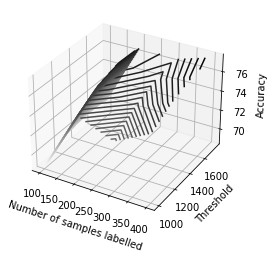

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('Number of samples labelled')
ax.set_ylabel('Threshold')
ax.set_zlabel('Accuracy')

## As we can see, we got an accuracy of 77.6% when we labelled 400 sample points and propagated it to points whose distance from the labelled points is less than threshold = 1750. This roughly labels around 50% of the dataset.

In [59]:
clf = LogisticRegression(random_state=42, multi_class = 'multinomial', verbose = 1).fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shankar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s finished


In [63]:
y_pred = clf.predict(X_test)

error = 0
        
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        error += 1
        
error = error/100

print("The accuracy of the model when we train on 60000 labelled points is : ", 100 - error, "%")

The accuracy of the model when we train on 60000 labelled points is :  84.12 %


## By using semi-supervised learning to label cluster centers and learning with a logistic regression model, we got a similar accuracy score (6% lesser) with less than 1% of the training samples having to be annotated manually. This is a chad move.